# Mode of work - Are we in the future?
In March 2020, the world as we knew it changed forever. This change affected the way we work globally. Millions of people in the workforce were required to adapt to what was then described as a ‘new way of working’. Three years on, people have begun to settle into one of three broad work models; working from the office, their homes or a hybrid of the two. We are a group of students from Indian Institute of Management, Kozhikode, working on an academic submission to collect data and study individual preferences on the different models of work and what are some factors that influence those choices across various regions globally

In [422]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import pearsonr
from statsmodels.stats.weightstats import ztest
import plotly.io as pio
pio.renderers.default = "png"

# Load the CSV "QT_Study_Sheet1.csv"
study_records = pd.read_csv('qt-survey-updated-2023-03-17.csv')

#Display the first five rows of study_records using the .head() method
print(study_records.head())

   age  gender marital_status  ... entry_id entry_status           created_at
0   48    Male        Married  ...      280       unread  2023-02-25 08:11:19
1   46  Female        Married  ...      279       unread  2023-02-24 17:39:37
2   48    Male        Married  ...      278       unread  2023-02-21 23:10:20
3   39  Female        Married  ...      277       unread  2023-02-19 22:04:31
4   32  Female        Married  ...      276       unread  2023-02-16 04:51:20

[5 rows x 30 columns]


In [423]:
#Use .info() to inspect the DataFrame study_records
print(study_records.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 30 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   age                                                         276 non-null    int64  
 1   gender                                                      276 non-null    object 
 2   marital_status                                              276 non-null    object 
 3   country                                                     276 non-null    object 
 4   place_you_live_in                                           276 non-null    object 
 5   no_of_family_members_living_with                            276 non-null    int64  
 6   employment_type                                             276 non-null    object 
 7   current_industry                                            276 non-null    object 
 8   

In [424]:
# print column names - iterating the columns
for col in study_records.columns:
    print(col)

age
gender
marital_status
country
place_you_live_in
no_of_family_members_living_with
employment_type
current_industry
current_industry_other
Number of employees in your organization
total_work_experience
work_experience_with_current_company
current_role_category
current_role_category_other
current_annual_salary
mode_of_working
how_many_days_you_go_to_office
how_many_days_personal_choice_or_prescribed_by_company
if_personal_choice_how_many_days_willing_to_work_in_office
total_commute_time_in_minutes
rating_wfh_hybrid_wfo
factors_influenced_wfo
factors_influenced_wfo_other
factors_influenced_hybrid
factors_influenced_hybrid_other
factors_influenced_wfh
factors_influenced_wfh_other
entry_id
entry_status
created_at


In [425]:
# shape of the data frame
study_records.shape

(276, 30)

In [426]:
#Finding Null Values
print(study_records.isnull().sum())

age                                                             0
gender                                                          0
marital_status                                                  0
country                                                         0
place_you_live_in                                               0
no_of_family_members_living_with                                0
employment_type                                                 0
current_industry                                                0
current_industry_other                                        247
Number of employees in your organization                        0
total_work_experience                                           0
work_experience_with_current_company                            0
current_role_category                                           0
current_role_category_other                                   260
current_annual_salary                                          73
mode_of_wo

In [427]:
 #data_types
 study_records.dtypes   

age                                                             int64
gender                                                         object
marital_status                                                 object
country                                                        object
place_you_live_in                                              object
no_of_family_members_living_with                                int64
employment_type                                                object
current_industry                                               object
current_industry_other                                         object
Number of employees in your organization                       object
total_work_experience                                         float64
work_experience_with_current_company                          float64
current_role_category                                          object
current_role_category_other                                    object
current_annual_salar

# Descriptive statistics

In [428]:
# Descriptive statistics

study_records.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,276.0,NaN,NaN,NaN,33.942029,6.996382,18.0,29.0,34.0,38.0,69.0
gender,276,3,Male,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,276,5,Married,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,276,6,India,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_you_live_in,276,5,Metro,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_family_members_living_with,276.0,NaN,NaN,NaN,2.818841,2.282695,0.0,2.0,3.0,4.0,27.0
employment_type,276,3,Private,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_industry,276,11,Technology,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
current_industry_other,29,24,Defence,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of employees in your organization,276,4,10000+,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Validation - Total Cells vs Missing %

In [429]:
#Find % of missing data
missing_count = study_records.isnull().sum() #number of missing
total_cells = np.product(study_records.shape) # number of cells (cols x rows)
total_missing = missing_count.sum()
missing_percent = (total_missing*100)/total_cells

print('Total : ', total_cells)
print('Total missing : ', total_missing)
print('Missing Percentage: ', missing_percent, '%')

Total :  8280
Total missing :  2181
Missing Percentage:  26.340579710144926 %


# Section 1 Descriptive Statistics in Project Report

# #1 Descriptive Statistics - Pie chart, Bar chart, Histogram and Box plots

# Age
- Interested in descriptive statistics

In [430]:
study_records['age'].unique()
study_records['age'].describe()

count    276.000000
mean      33.942029
std        6.996382
min       18.000000
25%       29.000000
50%       34.000000
75%       38.000000
max       69.000000
Name: age, dtype: float64

### Median Age

In [431]:
np.median(study_records['age'])

34.0

### Mode Age

In [432]:
stats.mode(study_records['age'])

ModeResult(mode=array([32]), count=array([23]))

# Age range

In [433]:
study_records['age_range'] = 0
study_records['age_range']= np.where((study_records['age']>=18) & (study_records['age']<=19), '18 - 19 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=20) & (study_records['age']<=24), '20 - 24 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=25) & (study_records['age']<=29), '25 - 29 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=30) & (study_records['age']<=34), '30 - 34 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=35) & (study_records['age']<=39), '35 - 39 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=40) & (study_records['age']<=44), '40 - 45 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=45) & (study_records['age']<=49), '45 - 49 years', study_records.age_range)
study_records['age_range']= np.where((study_records['age']>=50), '50 and above years', study_records.age_range)
age_range_df = study_records.groupby('age_range')['age_range'].count().to_frame('count').reset_index()
age_range_df

,age_range,count
0,18 - 19 years,4
1,20 - 24 years,9
2,25 - 29 years,62
3,30 - 34 years,74
4,35 - 39 years,79
5,40 - 45 years,36
6,45 - 49 years,6
7,50 and above years,6


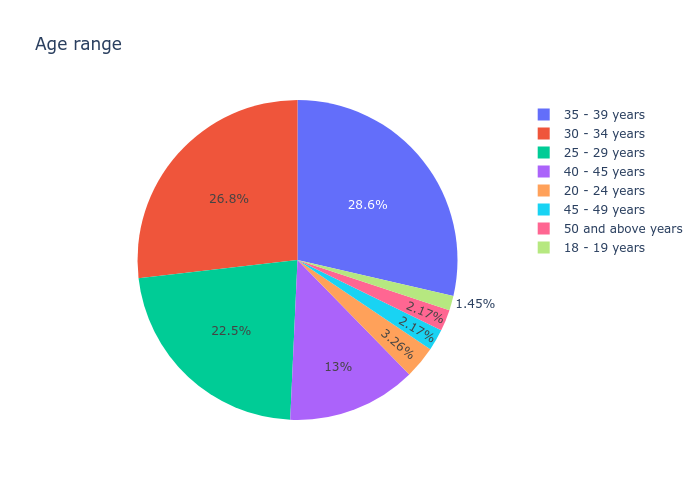

In [434]:
fig = px.pie(age_range_df, values='count', names='age_range', title='Age range')
fig.show()

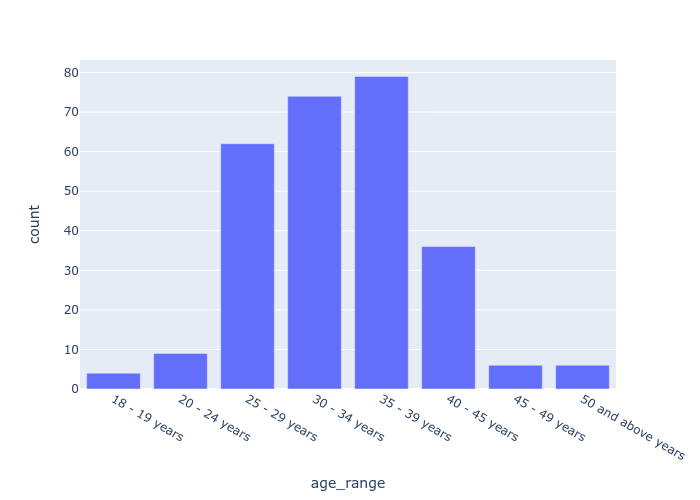

In [435]:
fig = px.bar(age_range_df, x='age_range', y='count')
fig.show()

# Gender
- Interested in total no.of Male / Female participants in the survey

In [436]:
study_records['gender'].unique()
#count number of each gender
study_records.groupby('gender')['gender'].count()

gender
Female         60
Male          214
Non-binary      2
Name: gender, dtype: int64

In [437]:
study_records.isnull().sum()['gender']
study_records['gender'].describe()

count      276
unique       3
top       Male
freq       214
Name: gender, dtype: object

In [438]:
gender_df = study_records.groupby('gender')['gender'].count().to_frame('count').reset_index()
gender_df

,gender,count
0,Female,60
1,Male,214
2,Non-binary,2


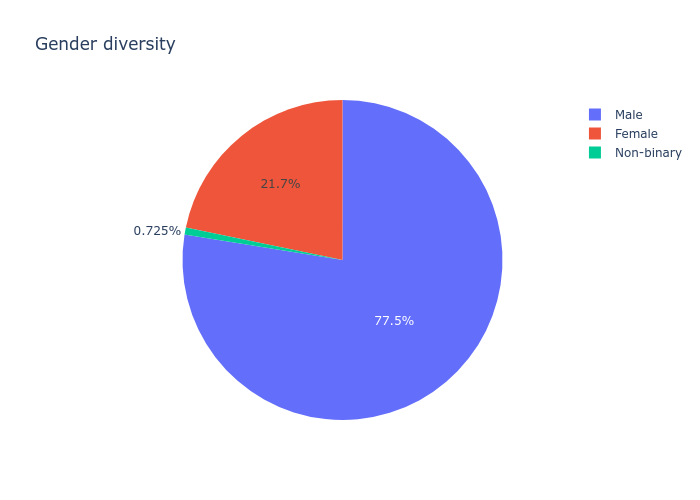

In [439]:
fig = px.pie(gender_df, values='count', names='gender', title='Gender diversity')
fig.show()

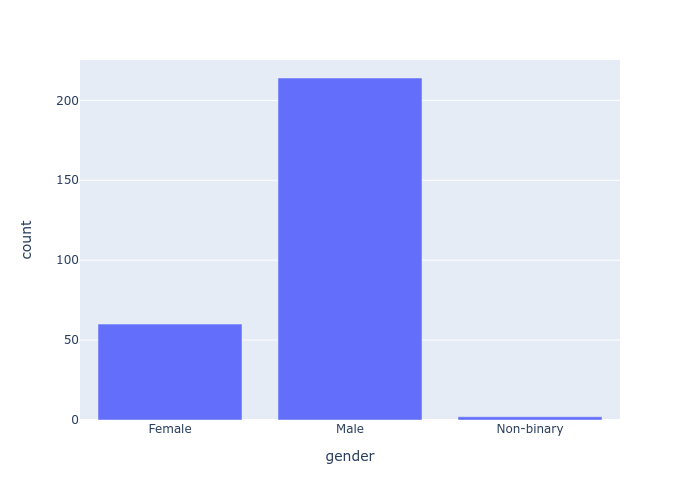

In [440]:
fig = px.bar(gender_df, x='gender', y='count')
fig.show()

# Marital Status

In [441]:

study_records['marital_status'].unique()
#count number of each marital_status
study_records.groupby('marital_status')['marital_status'].count()

marital_status
Married                   185
Registered Partnership      1
Seperated                   2
Single                     87
Widowed                     1
Name: marital_status, dtype: int64

In [442]:
study_records['marital_status'].describe()

count         276
unique          5
top       Married
freq          185
Name: marital_status, dtype: object

In [443]:
marital_status_df = study_records.groupby('marital_status')['marital_status'].count().to_frame('count').reset_index()
marital_status_df

,marital_status,count
0,Married,185
1,Registered Partnership,1
2,Seperated,2
3,Single,87
4,Widowed,1


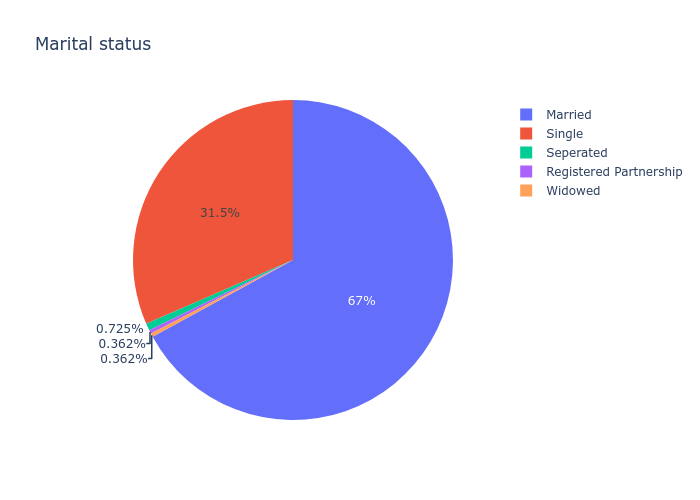

In [444]:

fig = px.pie(marital_status_df, values='count', names='marital_status', title='Marital status')
fig.show()

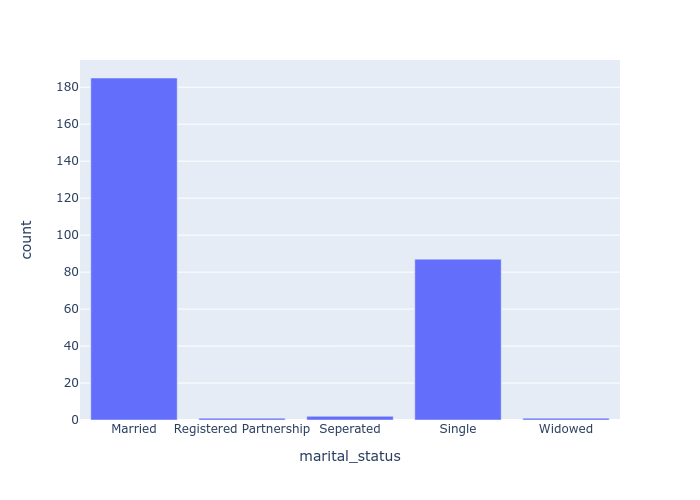

In [445]:
fig = px.bar(marital_status_df, x='marital_status', y='count')
fig.show()

# Country

In [446]:
study_records['country'].unique()
#count number of each country
study_records.groupby('country')['country'].count()

country
Australia               1
India                 267
Japan                   1
Luxembourg              1
Taiwan                  1
United States (US)      5
Name: country, dtype: int64

In [447]:
study_records['country'].describe()

count       276
unique        6
top       India
freq        267
Name: country, dtype: object

In [448]:
country_df = study_records.groupby('country')['country'].count().to_frame('count').reset_index()
country_df

,country,count
0,Australia,1
1,India,267
2,Japan,1
3,Luxembourg,1
4,Taiwan,1
5,United States (US),5


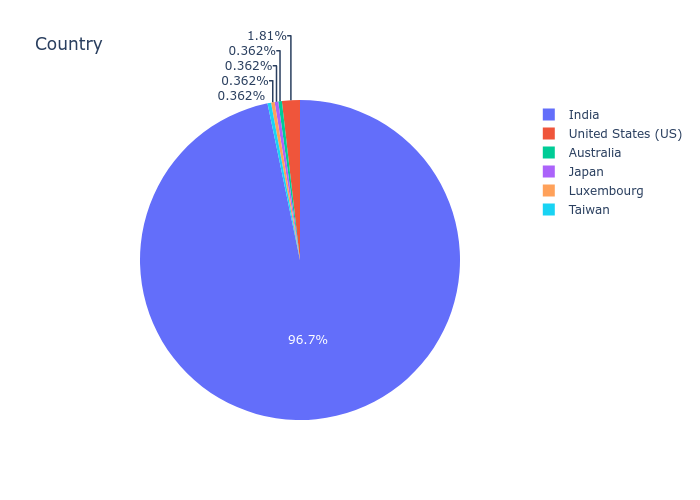

In [449]:

fig = px.pie(country_df, values='count', names='country', title='Country')
fig.show()

# Place you live in

In [450]:

study_records['place_you_live_in'].unique()
#count number of each place_you_live_in
study_records.groupby('place_you_live_in')['place_you_live_in'].count()

place_you_live_in
Metro         159
Semi Urban      6
Town           24
Urban          80
Village         7
Name: place_you_live_in, dtype: int64

In [451]:
study_records['place_you_live_in'].describe()

count       276
unique        5
top       Metro
freq        159
Name: place_you_live_in, dtype: object

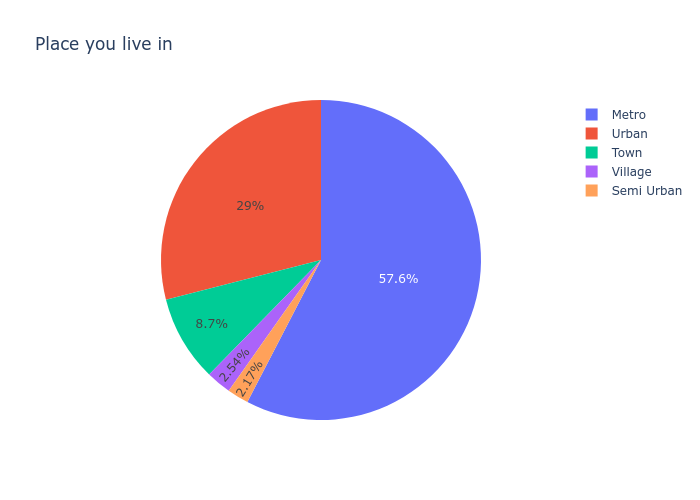

In [452]:
place_you_live_in_df = study_records.groupby('place_you_live_in')['place_you_live_in'].count().to_frame('count').reset_index()
place_you_live_in_df

fig = px.pie(place_you_live_in_df, values='count', names='place_you_live_in', title='Place you live in')
fig.show()

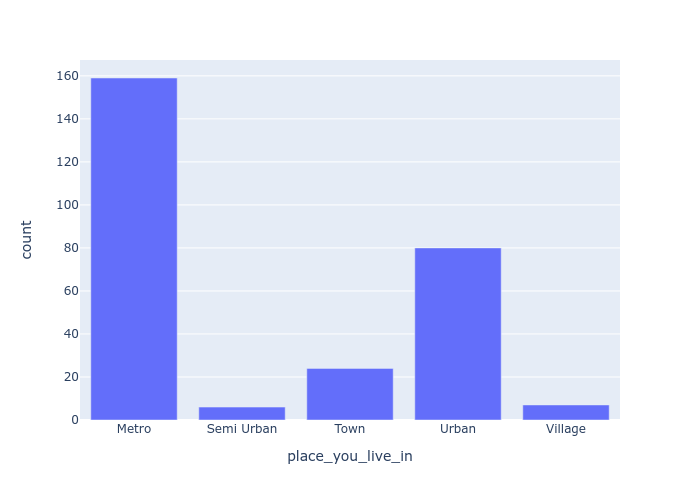

In [453]:
fig = px.bar(place_you_live_in_df, x='place_you_live_in', y='count')
fig.show()

# No of family members you are living with

In [454]:

study_records['no_of_family_members_living_with'].describe()

count    276.000000
mean       2.818841
std        2.282695
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       27.000000
Name: no_of_family_members_living_with, dtype: float64

### Mean family members

In [455]:
np.mean(study_records['no_of_family_members_living_with'])

2.818840579710145

### Median family members

In [456]:
np.median(study_records['no_of_family_members_living_with'])

3.0

### Mode family members

In [457]:
stats.mode(study_records['no_of_family_members_living_with'])

ModeResult(mode=array([3]), count=array([70]))

In [458]:
no_of_family_members_living_with_df = study_records.groupby('no_of_family_members_living_with')['no_of_family_members_living_with'].count().to_frame('count').reset_index()
no_of_family_members_living_with_df

,no_of_family_members_living_with,count
0,0,38
1,1,24
2,2,58
3,3,70
4,4,51
5,5,20
6,6,8
7,7,2
8,8,2
9,9,1


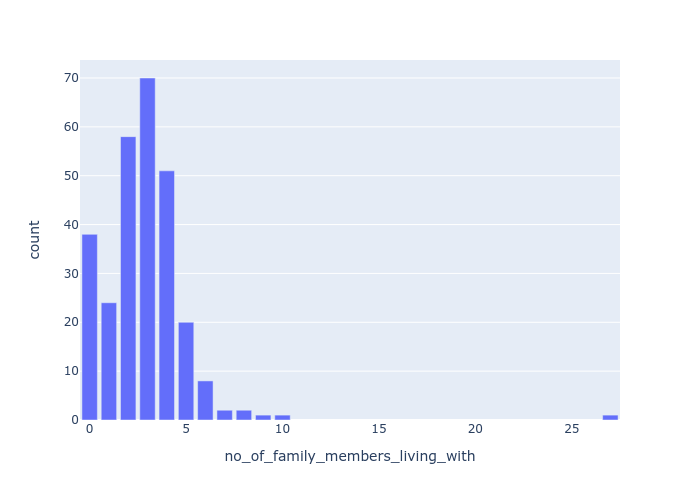

In [459]:

fig = px.bar(no_of_family_members_living_with_df, x='no_of_family_members_living_with', y='count')
fig.show()

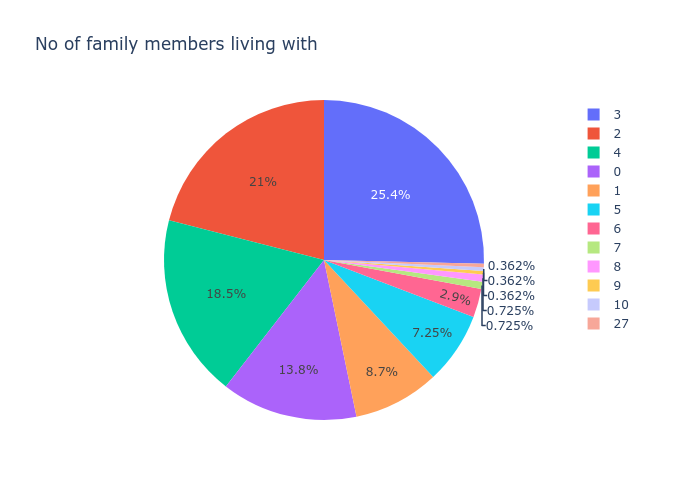

In [460]:
fig = px.pie(no_of_family_members_living_with_df, values='count', names='no_of_family_members_living_with', title='No of family members living with')
fig.show()

# Employment Type

In [461]:
study_records['employment_type'].unique()
#count number of each employment_type
study_records.groupby('employment_type')['employment_type'].count()

employment_type
Government        28
Private          233
Self Employed     15
Name: employment_type, dtype: int64

In [462]:
study_records['employment_type'].describe()

count         276
unique          3
top       Private
freq          233
Name: employment_type, dtype: object

In [463]:
employment_type_df = study_records.groupby('employment_type')['employment_type'].count().to_frame('count').reset_index()
employment_type_df

,employment_type,count
0,Government,28
1,Private,233
2,Self Employed,15


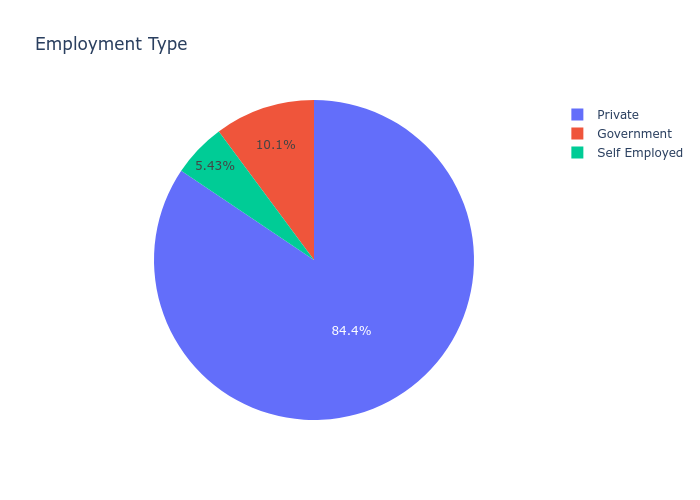

In [464]:

df = px.data.tips()
fig = px.pie(employment_type_df, values='count', names='employment_type', title='Employment Type')
fig.show()

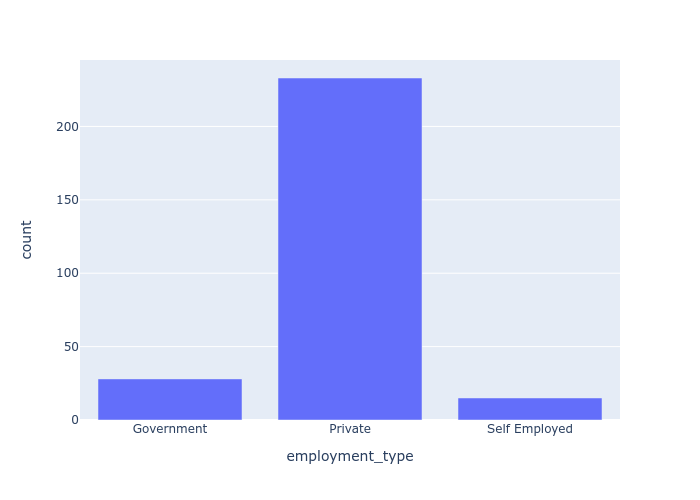

In [465]:
fig = px.bar(employment_type_df, x='employment_type', y='count')
fig.show()

# Current Industry

In [466]:
 
study_records['current_industry'].unique()
#count number of each current_industry
study_records.groupby('current_industry')['current_industry'].count()

current_industry
E-commerce         8
Educational        7
Entertainment      1
Finance           22
Healthcare        14
Hospitality        3
Manufacturing     29
Other             33
Real estate        2
Retail             2
Technology       155
Name: current_industry, dtype: int64

In [467]:
study_records['current_industry'].describe()

count            276
unique            11
top       Technology
freq             155
Name: current_industry, dtype: object

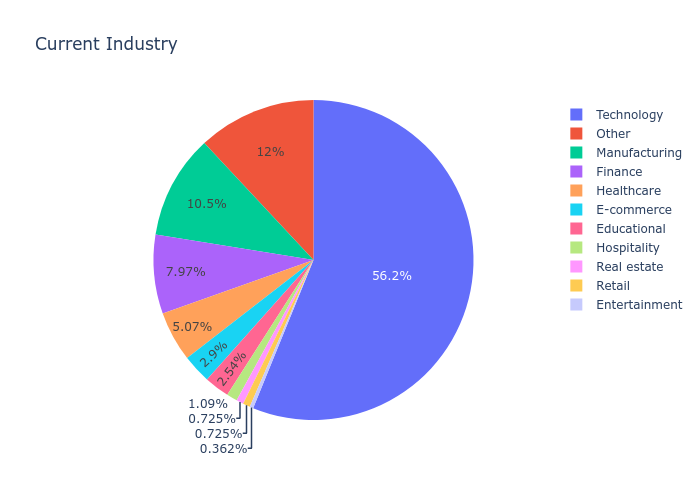

In [468]:
current_industry_df = study_records.groupby('current_industry')['current_industry'].count().to_frame('count').reset_index()
current_industry_df

fig = px.pie(current_industry_df, values='count', names='current_industry', title='Current Industry')
fig.show()

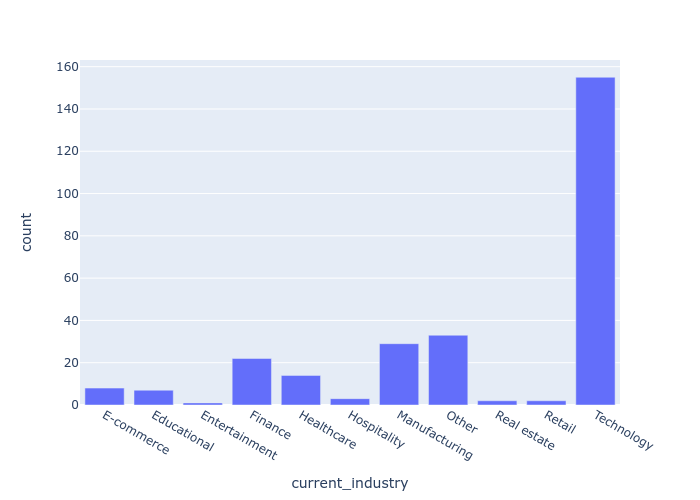

In [469]:
fig = px.bar(current_industry_df, x='current_industry', y='count')
fig.show()

### Current industry other than provided 
ToDo map industries to existing or create new one and map to main column

In [470]:
study_records['current_industry_other'].unique()
#count number of each current_industry_other
study_records.groupby('current_industry_other')['current_industry_other'].count()

current_industry_other
Administration                            1
Advisory                                  1
Consultancy                               1
Consulting                                2
Content Writer for multiple industries    1
Def.                                      1
Defence                                   3
Engineering                               2
Engineering services                      1
Healthcare and lifescience                1
Information Technology                    1
Infrastructure                            1
Intellectual Property                     1
Ip                                        1
Legal                                     1
Logistics                                 1
Oil                                       1
Oil and Gas                               1
Railway (Transport)                       1
Regulatory                                1
Renewable Energy                          1
Sea Food Processing & Exports             1
Telecom  

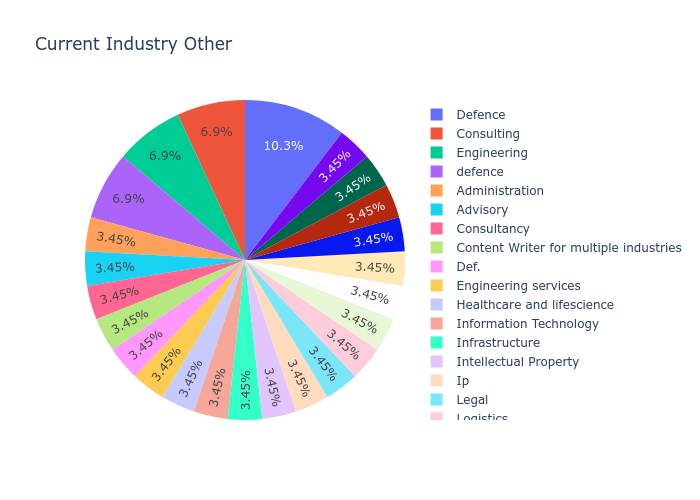

In [471]:
current_industry_other_df = study_records.groupby('current_industry_other')['current_industry_other'].count().to_frame('count').reset_index()
current_industry_other_df

fig = px.pie(current_industry_other_df, values='count', names='current_industry_other', title='Current Industry Other')
fig.show()

# Number of employees in your organization

In [472]:

study_records['Number of employees in your organization'].unique()
#count number of each Number of employees in your organization
study_records.groupby('Number of employees in your organization')['Number of employees in your organization'].count()

Number of employees in your organization
1-300          37
10000+        144
1001-10000     65
301-1000       30
Name: Number of employees in your organization, dtype: int64

In [473]:
study_records['Number of employees in your organization'].describe()

count        276
unique         4
top       10000+
freq         144
Name: Number of employees in your organization, dtype: object

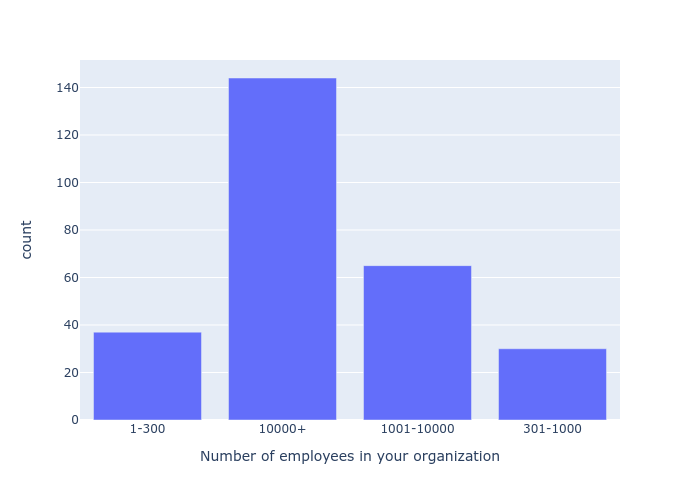

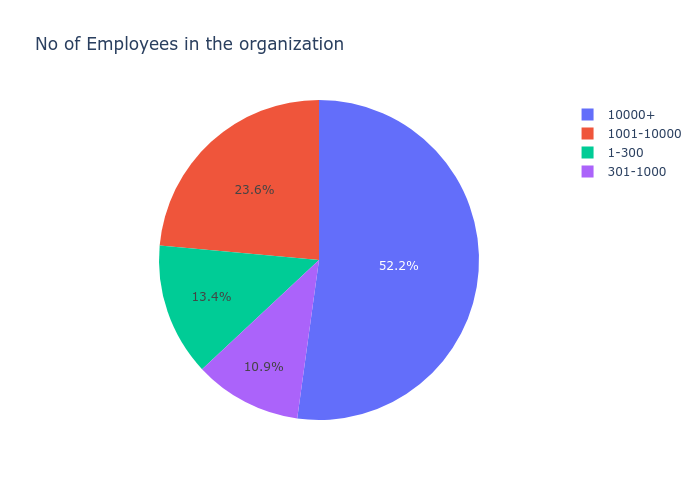

In [474]:
no_of_employees_org_df = study_records.groupby('Number of employees in your organization')['Number of employees in your organization'].count().to_frame('count').reset_index()
no_of_employees_org_df
fig = px.bar(no_of_employees_org_df, x='Number of employees in your organization', y='count')

fig.show()
fig = px.pie(no_of_employees_org_df, values='count', names='Number of employees in your organization', title='No of Employees in the organization')

fig.show()

# Total Work Experience

In [475]:

study_records['total_work_experience'].describe()

count    276.000000
mean      10.936123
std        6.370373
min        0.000000
25%        6.000000
50%       11.000000
75%       15.000000
max       49.000000
Name: total_work_experience, dtype: float64

## Box plot for Total work experience - Finding outliers

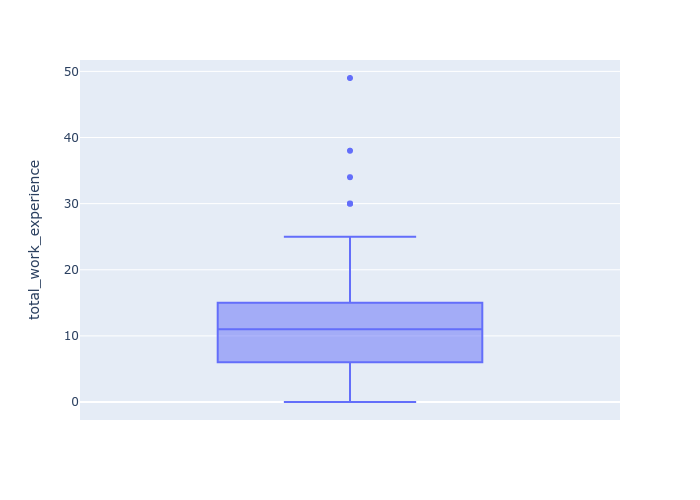

In [476]:
fig = px.box(study_records, y="total_work_experience")

fig.show()

In [477]:
np.median(study_records['total_work_experience'])

11.0

In [478]:
st.mode(study_records['total_work_experience'])

12.0

In [479]:
print(study_records[study_records['total_work_experience']>10]['age'].count())
print(study_records[study_records['total_work_experience']>15]['age'].count())
print(study_records[study_records['total_work_experience']>20]['age'].count())
print(study_records[study_records['total_work_experience']>25]['age'].count())

141
53
12
5


In [480]:
study_records[study_records['total_work_experience']>25]

,age,gender,marital_status,country,place_you_live_in,no_of_family_members_living_with,employment_type,current_industry,current_industry_other,Number of employees in your organization,total_work_experience,work_experience_with_current_company,current_role_category,current_role_category_other,current_annual_salary,mode_of_working,how_many_days_you_go_to_office,how_many_days_personal_choice_or_prescribed_by_company,if_personal_choice_how_many_days_willing_to_work_in_office,total_commute_time_in_minutes,rating_wfh_hybrid_wfo,factors_influenced_wfo,factors_influenced_wfo_other,factors_influenced_hybrid,factors_influenced_hybrid_other,factors_influenced_wfh,factors_influenced_wfh_other,entry_id,entry_status,created_at,age_range
9,60,Male,Married,India,Metro,1,Private,Manufacturing,NaN,301-1000,38.0,5.0,Top Level Management,NaN,48.0,Complete work from office,6.0,Prescribed by company,5.0,210,4,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,271,unread,2023-02-11 22:56:20,50 and above years
29,56,Male,Married,United States (US),Urban,2,Private,Technology,NaN,10000+,30.0,7.0,Mid-Level Management,NaN,NaN,Complete work from home,NaN,NaN,NaN,0,10,NaN,NaN,NaN,NaN,"Better focus on tasks & less distractions, Abl...",NaN,251,unread,2023-02-08 17:37:21,50 and above years
67,59,Male,Married,India,Metro,2,Government,Healthcare,NaN,1-300,30.0,24.0,Mid-Level Management,NaN,30.0,Complete work from office,7.0,Prescribed by company,3.0,10,5,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,213,unread,2023-02-07 17:28:13,50 and above years
70,69,Non-binary,Widowed,India,Metro,7,Self Employed,Real estate,NaN,1-300,49.0,49.0,Top Level Management,NaN,100.0,Complete work from office,5.0,Personal choice,NaN,10,1,"Better interpersonal connect, Better infrastru...",NaN,NaN,NaN,NaN,NaN,210,unread,2023-02-07 17:19:02,50 and above years
221,23,Non-binary,Registered Partnership,India,Town,27,Private,Educational,NaN,10000+,34.0,29.0,Associates,NaN,421.0,Complete work from home,NaN,NaN,NaN,50,10,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Work life ba...",NaN,59,unread,2023-02-06 11:50:57,20 - 24 years


In [481]:
study_records[study_records['total_work_experience']<=2]

,age,gender,marital_status,country,place_you_live_in,no_of_family_members_living_with,employment_type,current_industry,current_industry_other,Number of employees in your organization,total_work_experience,work_experience_with_current_company,current_role_category,current_role_category_other,current_annual_salary,mode_of_working,how_many_days_you_go_to_office,how_many_days_personal_choice_or_prescribed_by_company,if_personal_choice_how_many_days_willing_to_work_in_office,total_commute_time_in_minutes,rating_wfh_hybrid_wfo,factors_influenced_wfo,factors_influenced_wfo_other,factors_influenced_hybrid,factors_influenced_hybrid_other,factors_influenced_wfh,factors_influenced_wfh_other,entry_id,entry_status,created_at,age_range
21,25,Male,Single,India,Urban,5,Private,Healthcare,NaN,10000+,1.50,0.50,Associates,NaN,7.5,Hybrid,2.0,Prescribed by company,1.0,240,4,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,259,unread,2023-02-09 08:16:29,25 - 29 years
34,25,Male,Single,India,Metro,2,Private,Technology,NaN,1001-10000,2.00,2.00,Associates,NaN,7.0,Hybrid,2.0,Personal choice,NaN,25,5,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,246,unread,2023-02-08 13:34:17,25 - 29 years
43,25,Male,Single,India,Metro,0,Private,Finance,NaN,10000+,0.67,0.67,Frontline Managers,NaN,NaN,Hybrid,2.0,Personal choice,NaN,5,10,NaN,NaN,NaN,NaN,"Better focus on tasks & less distractions, Get...",NaN,237,unread,2023-02-08 04:00:12,25 - 29 years
59,25,Female,Single,India,Metro,0,Private,E-commerce,NaN,1001-10000,2.00,1.00,Top Level Management,NaN,11.0,Complete work from office,5.0,Prescribed by company,3.0,60,8,NaN,NaN,NaN,NaN,"Work life balance (Ex., better work life seper...",NaN,221,unread,2023-02-07 17:58:17,25 - 29 years
62,24,Male,Single,India,Urban,3,Private,Technology,NaN,10000+,2.00,2.00,Others,Software developer,15.0,Complete work from home,NaN,NaN,NaN,0,10,NaN,NaN,NaN,NaN,"Work life balance (Ex., better work life seper...",NaN,218,unread,2023-02-07 17:49:32,20 - 24 years
71,24,Male,Single,India,Urban,0,Private,Technology,NaN,1001-10000,2.00,2.00,Others,Software Developer,12.0,Hybrid,2.0,Prescribed by company,3.0,30,7,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,209,unread,2023-02-07 17:14:37,20 - 24 years
73,26,Male,Single,India,Metro,0,Private,Finance,NaN,301-1000,1.00,1.00,Associates,NaN,6.5,Complete work from office,5.0,Personal choice,NaN,10,7,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,207,unread,2023-02-07 17:12:35,25 - 29 years
74,25,Female,Single,India,Urban,0,Private,Finance,NaN,10000+,0.00,1.00,Associates,NaN,11.0,Hybrid,5.0,Prescribed by company,5.0,40,5,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,206,unread,2023-02-07 17:11:37,25 - 29 years
76,25,Male,Single,India,Town,4,Private,Technology,NaN,10000+,2.00,2.00,Others,SDE,10.0,Hybrid,1.0,Prescribed by company,1.0,60,9,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Work life ba...",NaN,204,unread,2023-02-07 17:08:16,25 - 29 years
102,20,Male,Single,India,Town,3,Private,Technology,NaN,1-300,0.00,0.60,Others,Intern,NaN,Complete work from office,5.0,Prescribed by company,4.0,480,3,"Better interpersonal connect, Better infrastru...",NaN,NaN,NaN,NaN,NaN,178,unread,2023-02-07 06:53:19,20 - 24 years


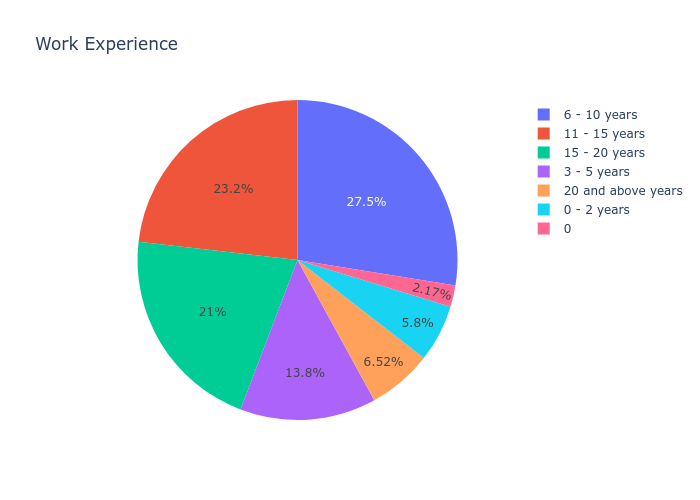

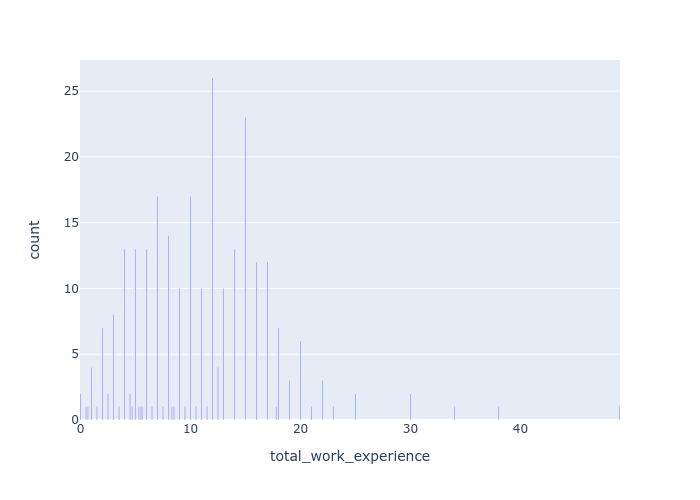

In [482]:
study_records['work_exp_range'] = 0
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=0) & (study_records['total_work_experience']<=2), '0 - 2 years', study_records.work_exp_range)
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=3) & (study_records['total_work_experience']<=5), '3 - 5 years', study_records.work_exp_range)
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=6) & (study_records['total_work_experience']<=10), '6 - 10 years', study_records.work_exp_range)
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=11) & (study_records['total_work_experience']<=15), '11 - 15 years', study_records.work_exp_range)
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=15) & (study_records['total_work_experience']<=20), '15 - 20 years', study_records.work_exp_range)
study_records['work_exp_range']= np.where((study_records['total_work_experience']>=20), '20 and above years', study_records.work_exp_range)
work_exp_range_df = study_records.groupby('work_exp_range')['work_exp_range'].count().to_frame('count').reset_index()
work_exp_range_df

df = px.data.tips()
fig = px.pie(work_exp_range_df, values='count', names='work_exp_range', title='Work Experience')

fig.show()

total_work_experience_df = study_records.groupby('total_work_experience')['total_work_experience'].count().to_frame('count').reset_index()
total_work_experience_df
fig = px.bar(total_work_experience_df, x='total_work_experience', y='count')

fig.show()



# Work Experience with Current Company

In [483]:

study_records['work_experience_with_current_company'].describe()

count    276.000000
mean       5.226703
std        5.699306
min        0.000000
25%        1.000000
50%        3.000000
75%        7.000000
max       49.000000
Name: work_experience_with_current_company, dtype: float64

In [484]:
np.median(study_records['work_experience_with_current_company'])

3.0

In [485]:
st.mode(study_records['work_experience_with_current_company'])

1.0

In [486]:
print(study_records[study_records['work_experience_with_current_company']>10]['age'].count())
print(study_records[study_records['work_experience_with_current_company']>20]['age'].count())
print(study_records[study_records['work_experience_with_current_company']>15]['age'].count())

36
6
12


## Records with wrong data where work_experience_with_current_company > total_work_experience

In [487]:
study_records[study_records['work_experience_with_current_company'] > study_records['total_work_experience']]

,age,gender,marital_status,country,place_you_live_in,no_of_family_members_living_with,employment_type,current_industry,current_industry_other,Number of employees in your organization,total_work_experience,work_experience_with_current_company,current_role_category,current_role_category_other,current_annual_salary,mode_of_working,how_many_days_you_go_to_office,how_many_days_personal_choice_or_prescribed_by_company,if_personal_choice_how_many_days_willing_to_work_in_office,total_commute_time_in_minutes,rating_wfh_hybrid_wfo,factors_influenced_wfo,factors_influenced_wfo_other,factors_influenced_hybrid,factors_influenced_hybrid_other,factors_influenced_wfh,factors_influenced_wfh_other,entry_id,entry_status,created_at,age_range,work_exp_range
74,25,Female,Single,India,Urban,0,Private,Finance,NaN,10000+,0.0,1.0,Associates,NaN,11.0,Hybrid,5.0,Prescribed by company,5.0,40,5,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,206,unread,2023-02-07 17:11:37,25 - 29 years,0 - 2 years
102,20,Male,Single,India,Town,3,Private,Technology,NaN,1-300,0.0,0.6,Others,Intern,NaN,Complete work from office,5.0,Prescribed by company,4.0,480,3,"Better interpersonal connect, Better infrastru...",NaN,NaN,NaN,NaN,NaN,178,unread,2023-02-07 06:53:19,20 - 24 years,0 - 2 years
140,35,Male,Married,India,Metro,4,Government,Finance,NaN,1-300,3.0,5.0,Mid-Level Management,NaN,500.0,Complete work from office,3.0,Prescribed by company,5.0,320,3,Better infrastructure,NaN,NaN,NaN,NaN,NaN,140,unread,2023-02-06 22:36:09,35 - 39 years,3 - 5 years


# Current role category

In [488]:
 
study_records['current_role_category'].unique()
#count number of each current_role_category
study_records.groupby('current_role_category')['current_role_category'].count()

current_role_category
Associates               58
Frontline Managers       52
Mid-Level Management    127
Others                   20
Top Level Management     19
Name: current_role_category, dtype: int64

In [489]:
study_records['current_role_category'].describe()

count                      276
unique                       5
top       Mid-Level Management
freq                       127
Name: current_role_category, dtype: object

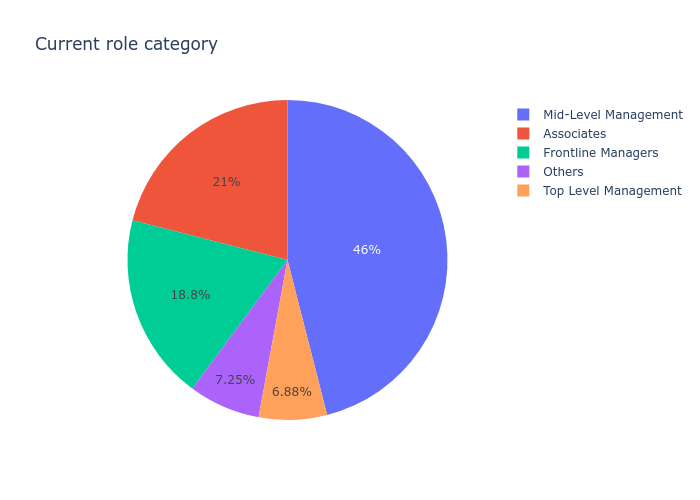

In [490]:
current_role_category_df = study_records.groupby('current_role_category')['current_role_category'].count().to_frame('count').reset_index()
current_role_category_df

fig = px.pie(current_role_category_df, values='count', names='current_role_category', title='Current role category')

fig.show()

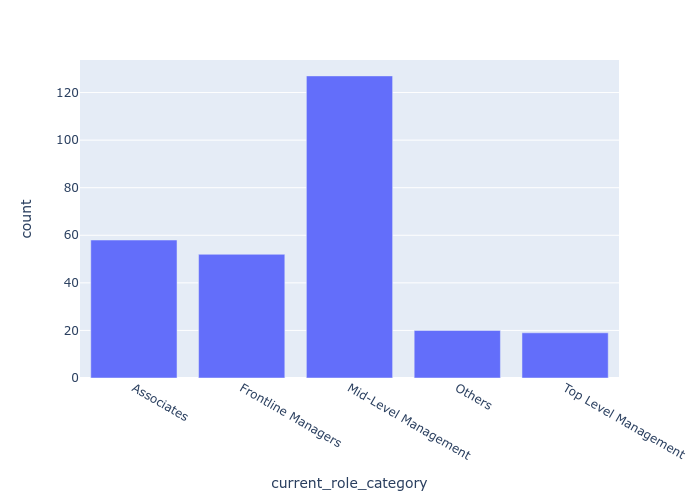

In [491]:
fig = px.bar(current_role_category_df, x='current_role_category', y='count')

fig.show()

# Current role category other
Need to see and merge other records with Current role category

In [492]:

study_records['current_role_category_other'].unique()
#count number of each current_role_category_other
study_records.groupby('current_role_category_other')['current_role_category_other'].count()

current_role_category_other
Air force officer           1
Consultant                  2
Data analyst                1
Developer                   1
Engineer                    2
IP Counsel                  1
Intern                      1
SDE                         1
Senior Designer Engineer    1
Senior Project Engineer     1
Software Developer          1
Software developer          1
Team Lead                   1
Team lead                   1
Name: current_role_category_other, dtype: int64

In [493]:
study_records['current_role_category_other'].describe()

count             16
unique            14
top       Consultant
freq               2
Name: current_role_category_other, dtype: object

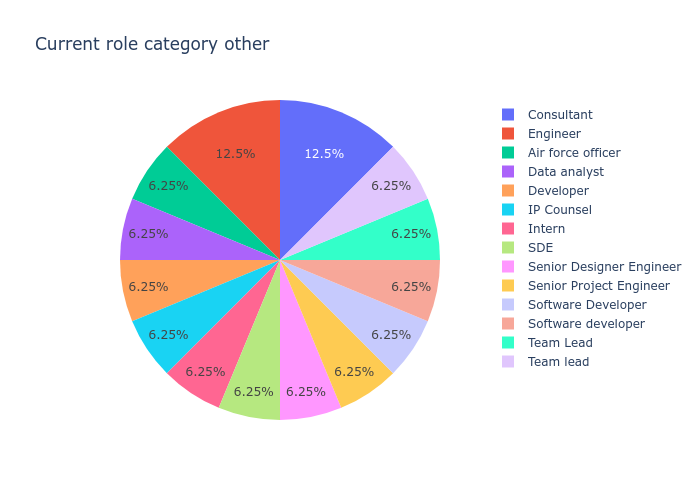

In [494]:
current_role_category_other_df = study_records.groupby('current_role_category_other')['current_role_category_other'].count().to_frame('count').reset_index()
current_role_category_other_df

fig = px.pie(current_role_category_other_df, values='count', names='current_role_category_other', title='Current role category other')

fig.show()

# Salary

In [495]:

study_records['current_annual_salary'].describe()

count    203.000000
mean      27.524631
std       48.460271
min        0.000000
25%       12.000000
50%       20.000000
75%       30.000000
max      500.000000
Name: current_annual_salary, dtype: float64

In [496]:
study_records.isnull().sum()['current_annual_salary']

73

In [497]:
study_records['current_annual_salary'].median()
st.mode(study_records['current_annual_salary'])

30.0

In [498]:
study_records['current_annual_salary'].value_counts()

30.0     21
15.0     14
25.0     14
20.0     13
18.0      9
12.0      7
0.0       7
10.0      6
14.0      6
11.0      5
40.0      5
22.0      5
8.0       5
24.0      5
16.0      4
7.0       4
6.0       4
5.0       4
9.0       4
42.0      4
28.0      3
7.5       3
1.0       3
50.0      3
32.0      3
19.0      3
13.0      2
21.0      2
70.0      2
37.0      2
48.0      2
23.0      2
17.0      1
80.0      1
5.5       1
4.0       1
35.0      1
421.0     1
27.0      1
38.0      1
2.5       1
3.0       1
55.0      1
33.0      1
19.5      1
6.5       1
24.5      1
500.0     1
26.0      1
225.0     1
65.0      1
18.5      1
45.0      1
57.0      1
60.0      1
100.0     1
95.0      1
36.0      1
47.0      1
Name: current_annual_salary, dtype: int64

## Filter Dataframe for null values

In [499]:
study_records[study_records['current_annual_salary'].isna()]['current_annual_salary']

1     NaN
2     NaN
5     NaN
7     NaN
8     NaN
       ..
247   NaN
259   NaN
268   NaN
269   NaN
270   NaN
Name: current_annual_salary, Length: 73, dtype: float64

###  Replace NAN salary records with Median salary

In [500]:
study_records['current_annual_salary'].fillna(study_records['current_annual_salary'].median())

0      70.0
1      20.0
2      20.0
3      50.0
4      50.0
       ... 
271    37.0
272    32.0
273     1.0
274    30.0
275    30.0
Name: current_annual_salary, Length: 276, dtype: float64

In [501]:
study_records['current_annual_salary'].fillna(study_records['current_annual_salary'].median(),inplace=True)


### Check for NAN salary records in filtered_records

In [502]:
study_records.isnull().sum()['current_annual_salary']

0

In [503]:
np.mean(study_records['current_annual_salary'])

25.534420289855074

In [504]:
np.median(study_records['current_annual_salary'])

20.0

In [505]:
st.mode(study_records['current_annual_salary'])

20.0

In [506]:
study_records['current_annual_salary'].describe()

count    276.00000
mean      25.53442
std       41.66605
min        0.00000
25%       15.00000
50%       20.00000
75%       25.00000
max      500.00000
Name: current_annual_salary, dtype: float64

In [507]:
# variance of population
st.pvariance(study_records['current_annual_salary'])

1729.7696485769798

In [508]:
# variance of sample data
st.variance(study_records['current_annual_salary'])

1736.0597200263505

In [509]:
# high median
st.median_high(study_records['current_annual_salary'])

20.0

In [510]:
# low median
st.median_low(study_records['current_annual_salary'])

20.0

In [511]:
st.median_grouped(study_records['current_annual_salary'])

19.96511627906977

In [512]:
# standard deviation of salary.
st.stdev(study_records['current_annual_salary'])

41.66604996908575

## Finding outliers in salary
Finding outliers using interquartile range

In [513]:
Q1 = study_records['current_annual_salary'].quantile(0.25)
Q3 = study_records['current_annual_salary'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10.0


In [514]:
print(study_records['current_annual_salary'].skew())
print(study_records['current_annual_salary'].describe())

8.988049299616398
count    276.00000
mean      25.53442
std       41.66605
min        0.00000
25%       15.00000
50%       20.00000
75%       25.00000
max      500.00000
Name: current_annual_salary, dtype: float64


skew 8.98 shows that it's a right skewed distribution
Higher salary is on the right side.

# Visualizing Outliers
Outliers can be visualized with
1. Box plot
2. Histogram
3. Scatterplot (with two variables)

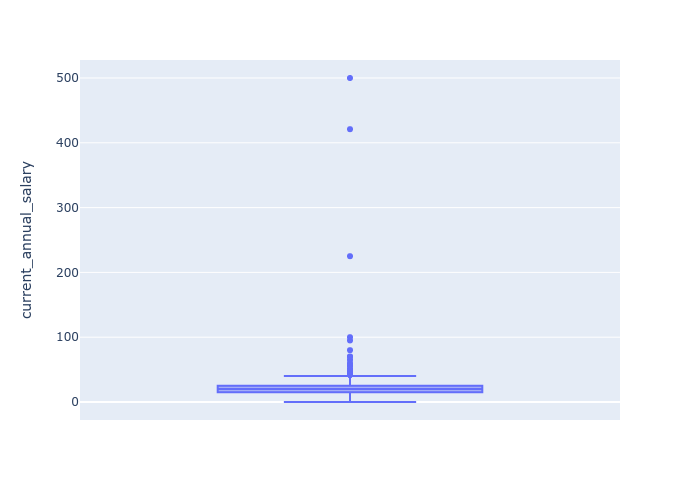

In [515]:
# Box plot
fig = px.box(study_records, y="current_annual_salary")

fig.show()

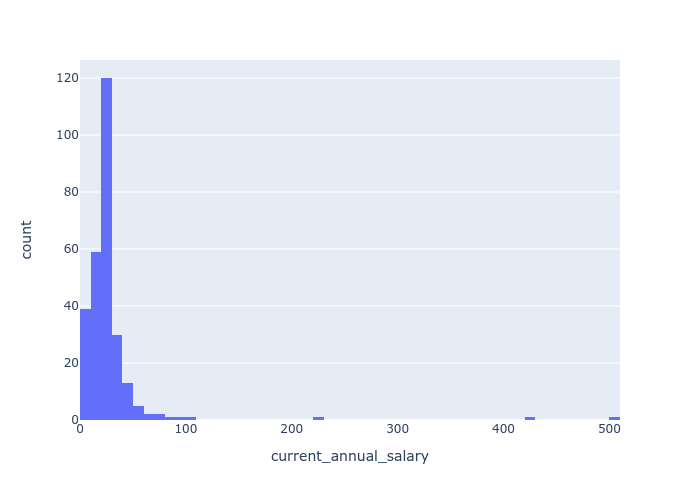

In [516]:
#By histogram

fig = px.histogram(study_records, x="current_annual_salary")

fig.show()

## Outlier treatment
Treat them until skewness is between -0.5 and 0.5

In [517]:
print(study_records['current_annual_salary'].quantile(0.10))
print(study_records['current_annual_salary'].quantile(0.90))

7.5
39.0


In [518]:

study_records['current_annual_salary'] = np.where(study_records['current_annual_salary'] < 7.5, 7.5, study_records['current_annual_salary'])
study_records["current_annual_salary"] = np.where(study_records["current_annual_salary"] > 39.0, 39.0,study_records['current_annual_salary'])
print(study_records['current_annual_salary'].skew())

0.49511902939165964


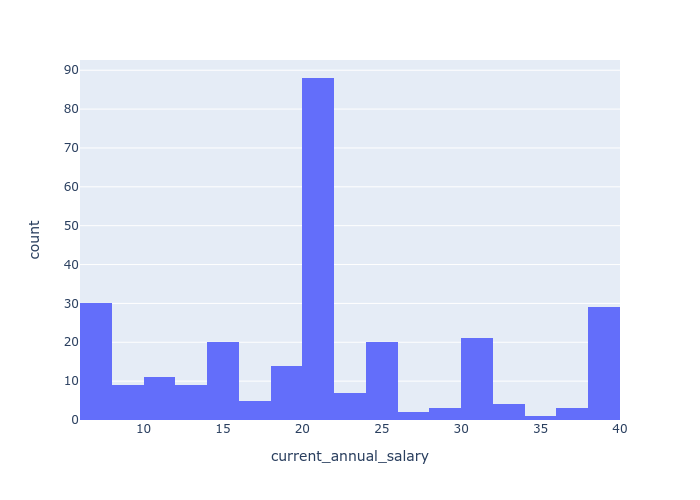

In [519]:
#By histogram

fig = px.histogram(study_records, x="current_annual_salary")

fig.show()

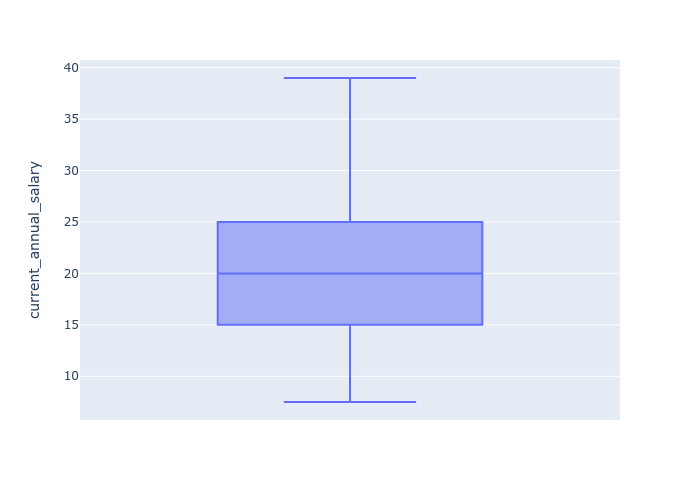

In [520]:
# Box plot after outlier treatment
fig = px.box(study_records, y="current_annual_salary")

fig.show()

# Finding ranges in salary

In [521]:
study_records['salary_range'] = 0
study_records['salary_range']= np.where((study_records['current_annual_salary']>=0) & (study_records['current_annual_salary']<=4), '0 - 4 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=5) & (study_records['current_annual_salary']<=9), '5 - 9 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=10) & (study_records['current_annual_salary']<=14), '10 - 14 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=15) & (study_records['current_annual_salary']<=19), '15 - 19 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=20) & (study_records['current_annual_salary']<=24), '20 - 24 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=25) & (study_records['current_annual_salary']<=29), '25 - 29 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=30) & (study_records['current_annual_salary']<=34), '30 - 34 Lakhs', study_records.salary_range)
study_records['salary_range']= np.where((study_records['current_annual_salary']>=35) & (study_records['current_annual_salary']<=39), '35 - 39 Lakhs', study_records.salary_range)

study_records['salary_range']= np.where((study_records['current_annual_salary']>=40), '40 and above lakhs', study_records.salary_range)
salary_range_df = study_records.groupby('salary_range')['salary_range'].count().to_frame('count').reset_index()
salary_range_df

,salary_range,count
0,0,2
1,10 - 14 Lakhs,26
2,15 - 19 Lakhs,32
3,20 - 24 Lakhs,100
4,25 - 29 Lakhs,19
5,30 - 34 Lakhs,25
6,35 - 39 Lakhs,33
7,5 - 9 Lakhs,39


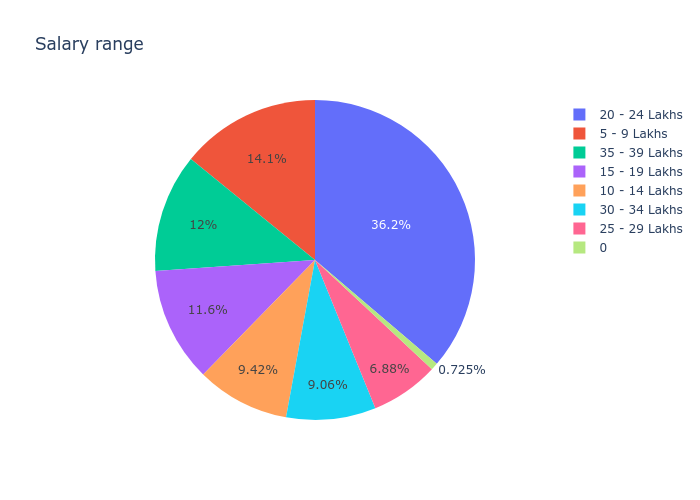

In [522]:

fig = px.pie(salary_range_df, values='count', names='salary_range', title='Salary range')

fig.show()

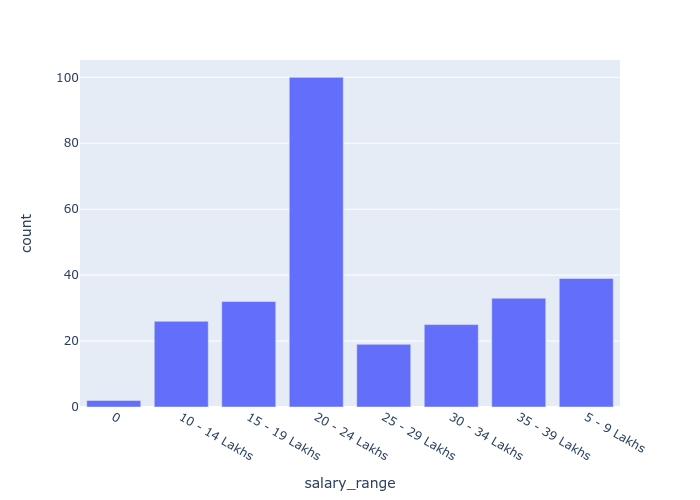

In [523]:
fig = px.bar(salary_range_df, x='salary_range', y='count')

fig.show()

# Mode of Working

In [524]:

study_records['mode_of_working'].describe()

count        276
unique         3
top       Hybrid
freq         127
Name: mode_of_working, dtype: object

In [525]:
study_records['mode_of_working'].unique()
#count number of each mode_of_working
study_records.groupby('mode_of_working')['mode_of_working'].count()

mode_of_working
Complete work from home       54
Complete work from office     95
Hybrid                       127
Name: mode_of_working, dtype: int64

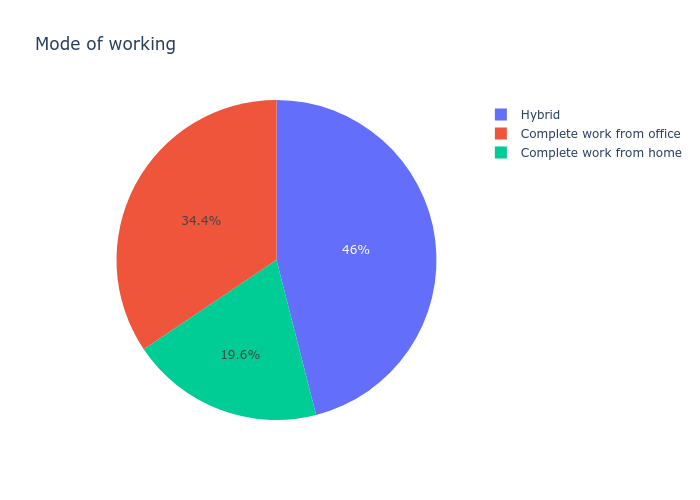

In [526]:
mode_of_working_df = study_records.groupby('mode_of_working')['mode_of_working'].count().to_frame('count').reset_index()
mode_of_working_df

fig = px.pie(mode_of_working_df, values='count', names='mode_of_working', title='Mode of working')

fig.show()

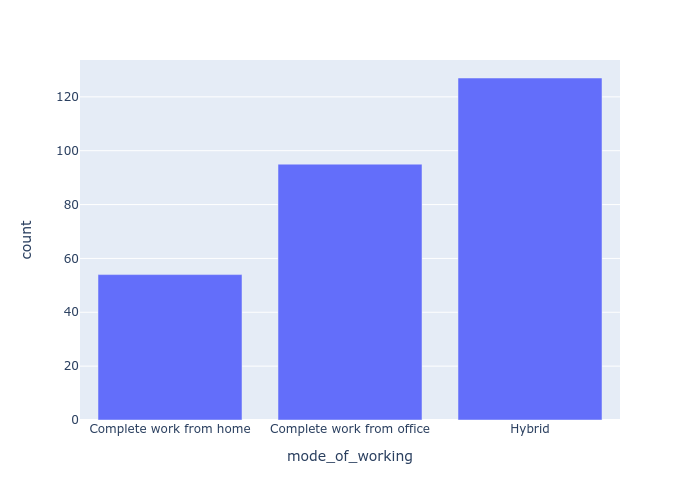

In [527]:
fig = px.bar(mode_of_working_df, x='mode_of_working', y='count')

fig.show()

# How many days you go to office?

In [528]:

study_records.isnull().sum()['how_many_days_you_go_to_office']

55

In [529]:
study_records['how_many_days_you_go_to_office'].describe()

count    221.000000
mean       3.647059
std        1.711552
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        7.000000
Name: how_many_days_you_go_to_office, dtype: float64

In [530]:
# Median
print(study_records['how_many_days_you_go_to_office'].median())

3.0


In [531]:
st.mode(study_records['how_many_days_you_go_to_office'])

2.0

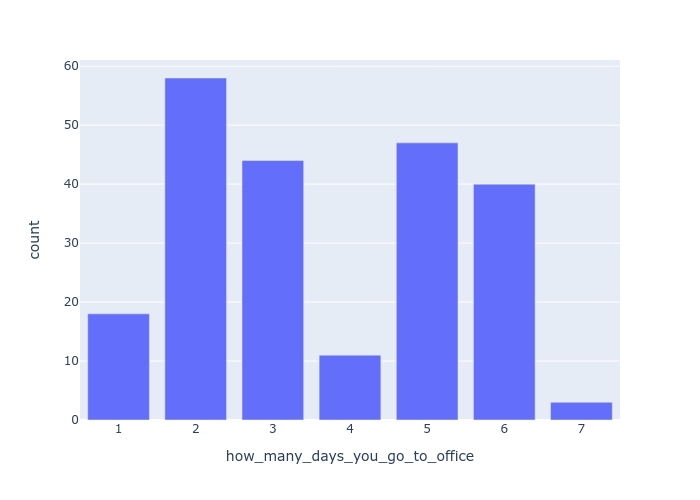

In [532]:
how_many_days_you_go_to_office_df = study_records.groupby('how_many_days_you_go_to_office')['how_many_days_you_go_to_office'].count().to_frame('count').reset_index()
how_many_days_you_go_to_office_df
fig = px.bar(how_many_days_you_go_to_office_df, x='how_many_days_you_go_to_office', y='count')

fig.show()

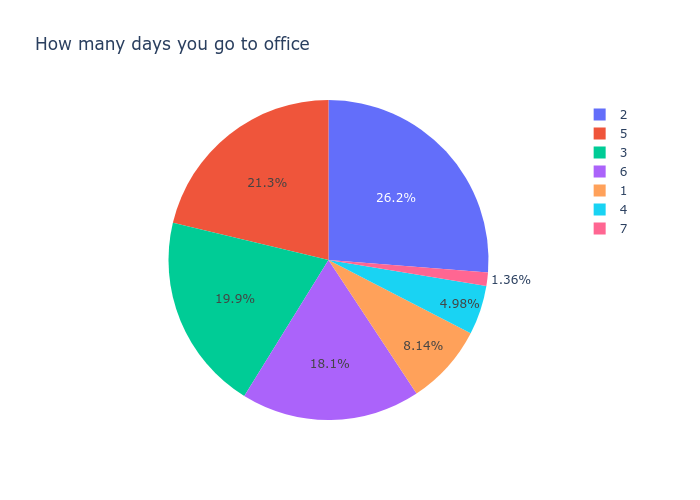

In [533]:
fig = px.pie(how_many_days_you_go_to_office_df, values='count', names='how_many_days_you_go_to_office', title='How many days you go to office')

fig.show()

# Personal choice or prescribed by company

In [534]:
study_records.groupby('how_many_days_personal_choice_or_prescribed_by_company')['how_many_days_personal_choice_or_prescribed_by_company'].count()         

how_many_days_personal_choice_or_prescribed_by_company
Personal choice           58
Prescribed by company    163
Name: how_many_days_personal_choice_or_prescribed_by_company, dtype: int64

In [535]:
study_records['how_many_days_personal_choice_or_prescribed_by_company'].describe()

count                       221
unique                        2
top       Prescribed by company
freq                        163
Name: how_many_days_personal_choice_or_prescribed_by_company, dtype: object

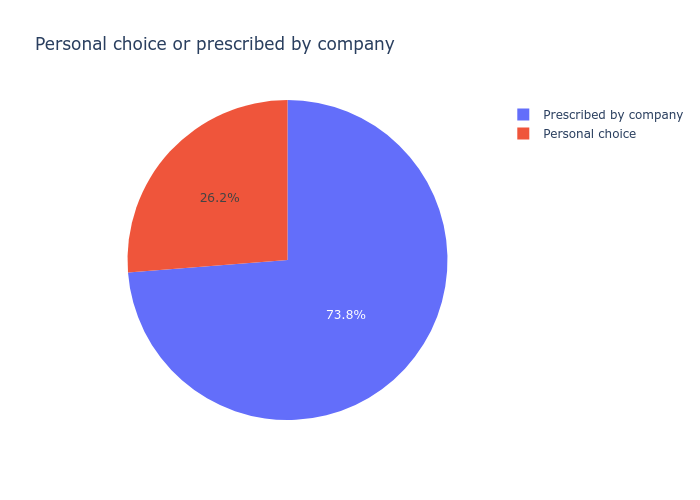

In [536]:
how_many_days_personal_choice_or_prescribed_by_company_df = study_records.groupby('how_many_days_personal_choice_or_prescribed_by_company')['how_many_days_personal_choice_or_prescribed_by_company'].count().to_frame('count').reset_index()
how_many_days_personal_choice_or_prescribed_by_company_df

fig = px.pie(how_many_days_personal_choice_or_prescribed_by_company_df, values='count', names='how_many_days_personal_choice_or_prescribed_by_company', title='Personal choice or prescribed by company')

fig.show()

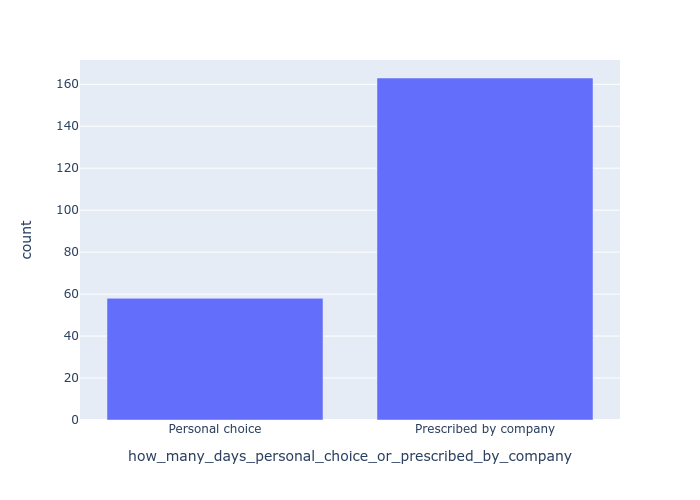

In [537]:
fig = px.bar(how_many_days_personal_choice_or_prescribed_by_company_df, x='how_many_days_personal_choice_or_prescribed_by_company', y='count')

fig.show()

- # How many days willing to work in office, if it's personal choice

In [538]:

study_records['if_personal_choice_how_many_days_willing_to_work_in_office'].describe()

count    163.00000
mean       2.90184
std        1.72925
min        0.00000
25%        2.00000
50%        3.00000
75%        5.00000
max        7.00000
Name: if_personal_choice_how_many_days_willing_to_work_in_office, dtype: float64

In [539]:
st.mode(study_records['if_personal_choice_how_many_days_willing_to_work_in_office'])

5.0

In [540]:
print(study_records['if_personal_choice_how_many_days_willing_to_work_in_office'].median())

3.0


# Total commute time

In [541]:

study_records['total_commute_time_in_minutes'].describe()

count     276.000000
mean       93.105072
std       137.954247
min         0.000000
25%        30.000000
50%        60.000000
75%       120.000000
max      1440.000000
Name: total_commute_time_in_minutes, dtype: float64

In [542]:
st.mode(study_records['total_commute_time_in_minutes'])

60

In [543]:
print(study_records['total_commute_time_in_minutes'].median())

60.0


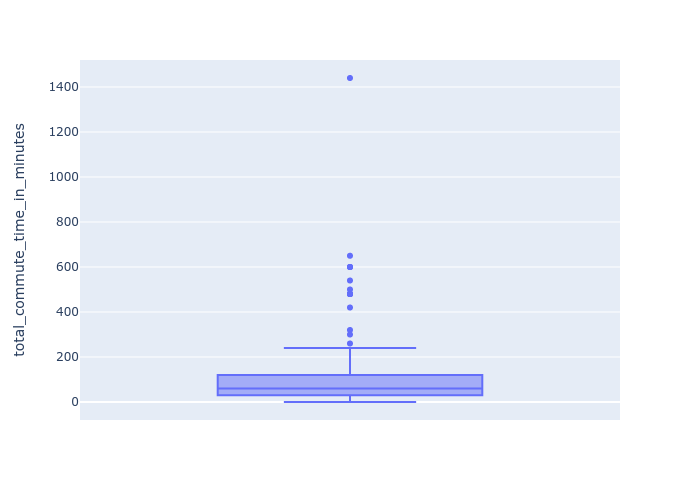

In [544]:
# Box plot
fig = px.box(study_records, y="total_commute_time_in_minutes")

fig.show()

In [545]:
print(study_records['total_commute_time_in_minutes'].quantile(0.10))
print(study_records['total_commute_time_in_minutes'].quantile(0.90))

1.0
180.0


In [546]:

study_records['total_commute_time_in_minutes'] = np.where(study_records['total_commute_time_in_minutes'] < 1.0, 1.0, study_records['total_commute_time_in_minutes'])
study_records["total_commute_time_in_minutes"] = np.where(study_records["total_commute_time_in_minutes"] > 180.0, 180.0,study_records['total_commute_time_in_minutes'])
print(study_records['total_commute_time_in_minutes'].skew())

0.6940746637959906


# Rating WFO, Hybrid and WFH

## Note: Though rating is ordinal data, if we treat rating as score, to the extent participants prefer more towards WFH

In [547]:

study_records['rating_wfh_hybrid_wfo'].describe()

count    276.000000
mean       6.119565
std        2.811052
min        0.000000
25%        5.000000
50%        6.000000
75%        8.250000
max       10.000000
Name: rating_wfh_hybrid_wfo, dtype: float64

In [548]:
### Note: Though rating is ordinal data, if we treat rating as score, to the extent participants prefer more towards WFH
study_records['rating_wfh_hybrid_wfo'].median()

6.0

In [549]:
st.mode(study_records['rating_wfh_hybrid_wfo'])

5

-0.25871670050620477


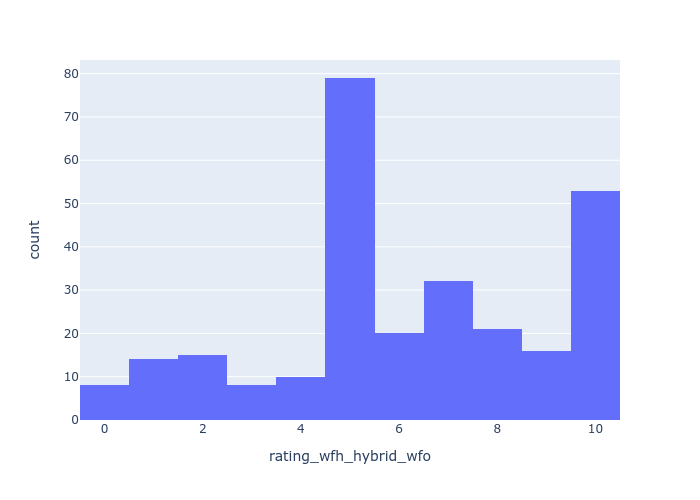

In [550]:
# histogram of rating data distribution
#By histogram
print(study_records['rating_wfh_hybrid_wfo'].skew())

fig = px.histogram(study_records, x="rating_wfh_hybrid_wfo")

fig.show()

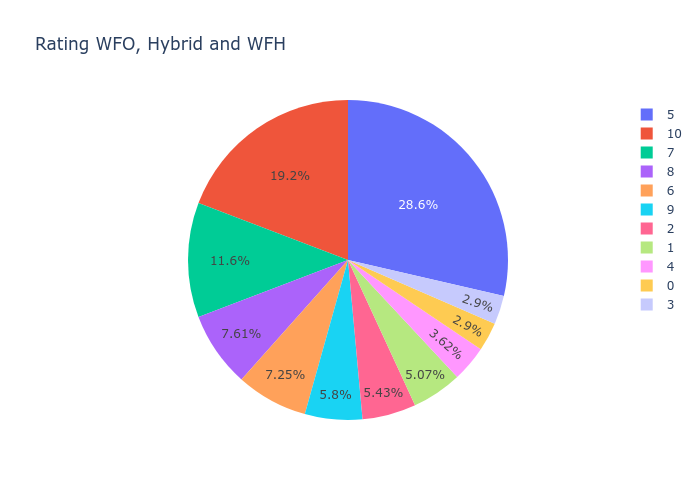

In [551]:
rating_wfh_hybrid_wfo_df = study_records.groupby('rating_wfh_hybrid_wfo')['rating_wfh_hybrid_wfo'].count().to_frame('count').reset_index()
rating_wfh_hybrid_wfo_df

fig = px.pie(rating_wfh_hybrid_wfo_df, values='count', names='rating_wfh_hybrid_wfo', title='Rating WFO, Hybrid and WFH')

fig.show()

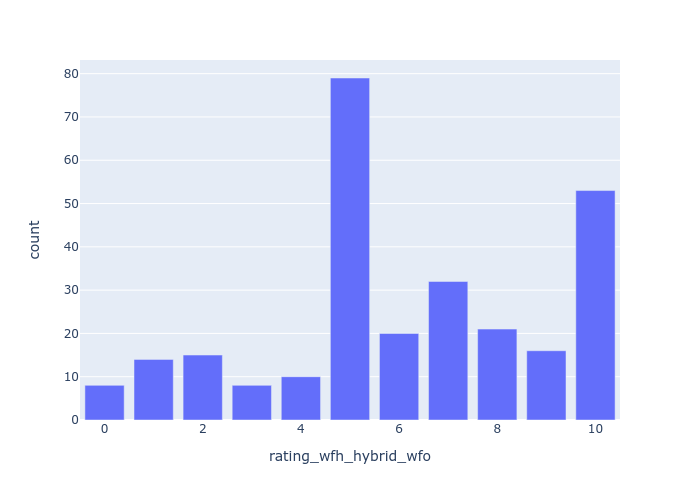

In [552]:
fig = px.bar(rating_wfh_hybrid_wfo_df, x='rating_wfh_hybrid_wfo', y='count')

fig.show()

# Factors WFO

In [553]:


study_records['factors_influenced_wfo'].unique()
#count number of each factors_influenced_wfo
study_records.groupby('factors_influenced_wfo')['factors_influenced_wfo'].count()

factors_influenced_wfo
Better Productivity                                                                                                                                                                                                                                             1
Better focus on tasks & less distractions, Better Productivity, Other                                                                                                                                                                                           1
Better focus on tasks & less distractions, Having a more physically active life, Better Productivity, Optimize Innovation & Collaboration                                                                                                                       1
Better infrastructure                                                                                                                                                                                      

In [554]:
wfo_list = study_records['factors_influenced_wfo'].unique().tolist()
wfo_list

['Better interpersonal connect, Better infrastructure',
 nan,
 'Better interpersonal connect, Better infrastructure, Work life balance (Ex., better work life seperation)',
 'Better interpersonal connect, Better infrastructure, Work life balance (Ex., better work life seperation), Better focus on tasks & less distractions, Having a more physically active life, Better Productivity, Optimize Innovation & Collaboration',
 'Better interpersonal connect, Better infrastructure, Work life balance (Ex., better work life seperation), Better focus on tasks & less distractions, Having a more physically active life, Better Productivity',
 'Better interpersonal connect, Having a more physically active life, Optimize Innovation & Collaboration',
 'Better interpersonal connect',
 'Better interpersonal connect, Better infrastructure, Better focus on tasks & less distractions, Having a more physically active life, Better Productivity, Optimize Innovation & Collaboration',
 'Better interpersonal connect,

# Factors effecting rating

In [555]:
#hybrid
factors_hybrid_expanded = study_records['factors_influenced_hybrid'].str.split(',', expand=True)
factors_hybrid_expanded.columns = ['factors_influenced_hybrid_'+str(i) for i in factors_hybrid_expanded.columns]

factors_hybrid_expanded_concat = pd.concat([study_records,factors_hybrid_expanded], axis=1)

factors_rating_hybrid_df = pd.melt(factors_hybrid_expanded_concat, id_vars=['entry_id','rating_wfh_hybrid_wfo','gender','place_you_live_in'], value_vars=factors_hybrid_expanded.columns, var_name='factors', value_name='factors_val').dropna()
factors_rating_hybrid_df

#wfh
factors_wfh_expanded = study_records['factors_influenced_wfh'].str.split(',', expand=True)
factors_wfh_expanded.columns = ['factors_influenced_wfh_'+str(i) for i in factors_wfh_expanded.columns]

factors_wfh_expanded_concat = pd.concat([study_records,factors_wfh_expanded], axis=1)

factors_rating_wfh_df = pd.melt(factors_wfh_expanded_concat, id_vars=['entry_id','rating_wfh_hybrid_wfo','gender','place_you_live_in'], value_vars=factors_wfh_expanded.columns, var_name='factors', value_name='factors_val').dropna()
factors_rating_wfh_df


#wfo
factors_wfo_expanded = study_records['factors_influenced_wfo'].str.split(',', expand=True)
factors_wfo_expanded.columns = ['factors_influenced_wfo_'+str(i) for i in factors_wfo_expanded.columns]

factors_wfo_expanded_concat = pd.concat([study_records,factors_wfo_expanded], axis=1)

factors_rating_wfo_df = pd.melt(factors_wfo_expanded_concat, id_vars=['entry_id','rating_wfh_hybrid_wfo','gender','place_you_live_in'], value_vars=factors_wfo_expanded.columns, var_name='factors', value_name='factors_val').dropna()
factors_rating_wfo_df

#combine frames
frames = [factors_rating_wfo_df,factors_rating_hybrid_df,factors_rating_wfh_df ]
  
factors_wfo_hybrid_wfh_result_df = pd.concat(frames)
factors_wfo_hybrid_wfh_result_df

,entry_id,rating_wfh_hybrid_wfo,gender,place_you_live_in,factors,factors_val
0,280,1,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect
11,269,2,Male,Urban,factors_influenced_wfo_0,Better interpersonal connect
33,247,3,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect
35,245,1,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect
38,242,2,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect
...,...,...,...,...,...,...
2178,34,9,Male,Semi Urban,factors_influenced_wfh_7,Better Productivity
2186,26,10,Male,Metro,factors_influenced_wfh_7,Better Productivity
2193,19,10,Female,Town,factors_influenced_wfh_7,Better Productivity
2195,17,8,Male,Town,factors_influenced_wfh_7,Better Productivity


In [556]:
factors_wfo_hybrid_wfh_result_df['mode_of_working_coded'] = ''

factors_wfo_hybrid_wfh_result_df['mode_of_working_coded'] = 0
factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']= np.where((factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']>=0) & (factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']<=3), 'WFO', factors_wfo_hybrid_wfh_result_df.mode_of_working_coded)
factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']= np.where((factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']>=4) & (factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']<=7), 'Hybrid', factors_wfo_hybrid_wfh_result_df.mode_of_working_coded)
factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']= np.where((factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']>=8) & (factors_wfo_hybrid_wfh_result_df['rating_wfh_hybrid_wfo']<=10), 'WFH', factors_wfo_hybrid_wfh_result_df.mode_of_working_coded)

factors_wfo_hybrid_wfh_result_df


,entry_id,rating_wfh_hybrid_wfo,gender,place_you_live_in,factors,factors_val,mode_of_working_coded
0,280,1,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect,WFO
11,269,2,Male,Urban,factors_influenced_wfo_0,Better interpersonal connect,WFO
33,247,3,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect,WFO
35,245,1,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect,WFO
38,242,2,Male,Metro,factors_influenced_wfo_0,Better interpersonal connect,WFO
...,...,...,...,...,...,...,...
2178,34,9,Male,Semi Urban,factors_influenced_wfh_7,Better Productivity,WFH
2186,26,10,Male,Metro,factors_influenced_wfh_7,Better Productivity,WFH
2193,19,10,Female,Town,factors_influenced_wfh_7,Better Productivity,WFH
2195,17,8,Male,Town,factors_influenced_wfh_7,Better Productivity,WFH


In [557]:
mode_of_working_group_df = factors_wfo_hybrid_wfh_result_df.groupby('mode_of_working_coded')['mode_of_working_coded'].count().to_frame('mode_of_working_coded_count').reset_index()

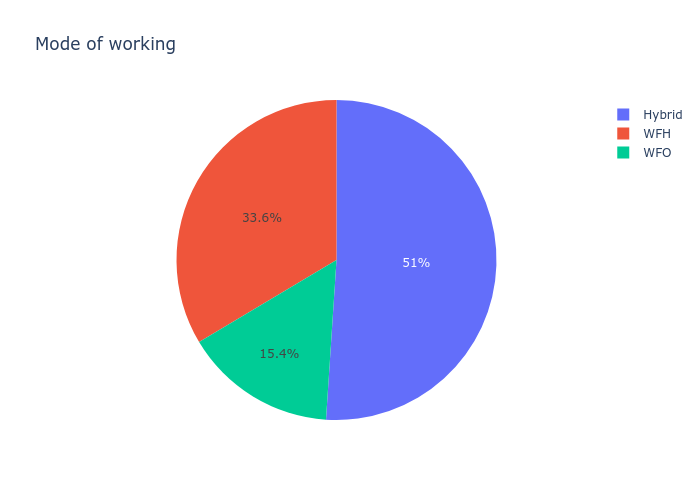

In [558]:

fig = px.pie(mode_of_working_group_df, values='mode_of_working_coded_count', names='mode_of_working_coded', title='Mode of working')

fig.show()

# Mode of working Hybrid - Factors

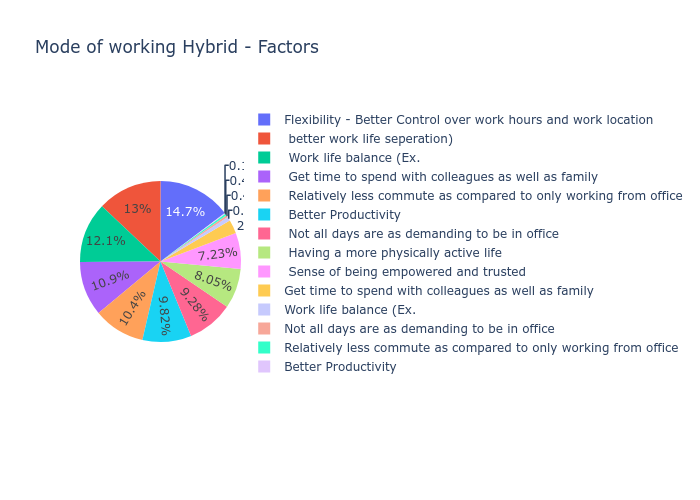

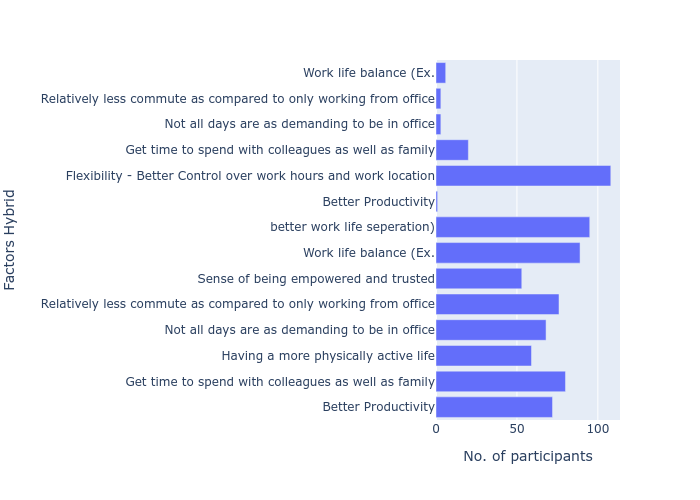

In [559]:
mode_of_working_hybrid_group_df = factors_wfo_hybrid_wfh_result_df[factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']== 'Hybrid'].groupby('factors_val')['factors_val'].count().to_frame('factors_hybrid_count').reset_index()

fig = px.pie(mode_of_working_hybrid_group_df, values='factors_hybrid_count', names='factors_val', title='Mode of working Hybrid - Factors')

fig.show()

fig = px.bar(mode_of_working_hybrid_group_df, x='factors_hybrid_count', y='factors_val', labels={
                     "factors_hybrid_count": "No. of participants",
                     "factors_val": "Factors Hybrid"
                 })

fig.show()

# Mode of working WFO - Factors

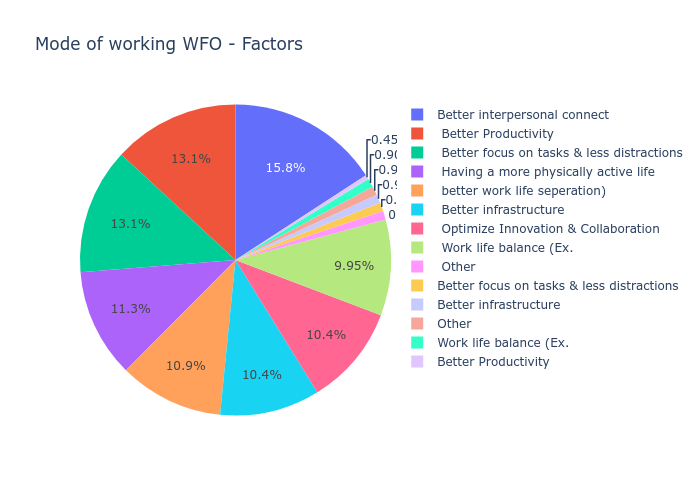

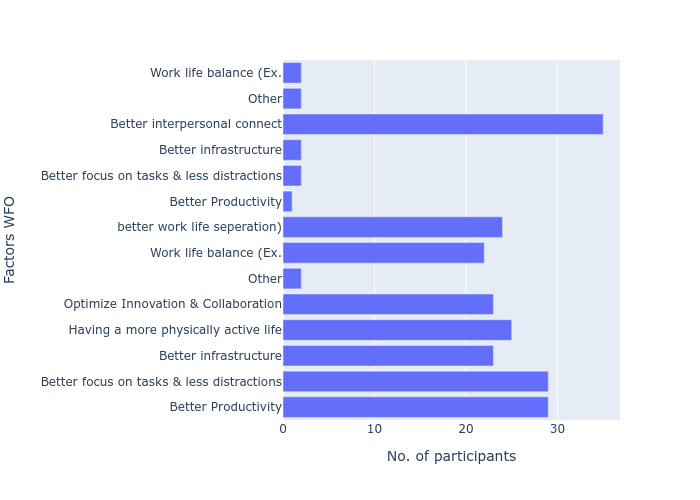

In [560]:
mode_of_working_wfo_group_df = factors_wfo_hybrid_wfh_result_df[factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']== 'WFO'].groupby('factors_val')['factors_val'].count().to_frame('factors_wfo_count').reset_index()

fig = px.pie(mode_of_working_wfo_group_df, values='factors_wfo_count', names='factors_val', title='Mode of working WFO - Factors')

fig.show()

fig = px.bar(mode_of_working_wfo_group_df, x='factors_wfo_count', y='factors_val', labels={
                     "factors_wfo_count": "No. of participants",
                     "factors_val": "Factors WFO"
                 })

fig.show()

# Mode of working WFH - Factors

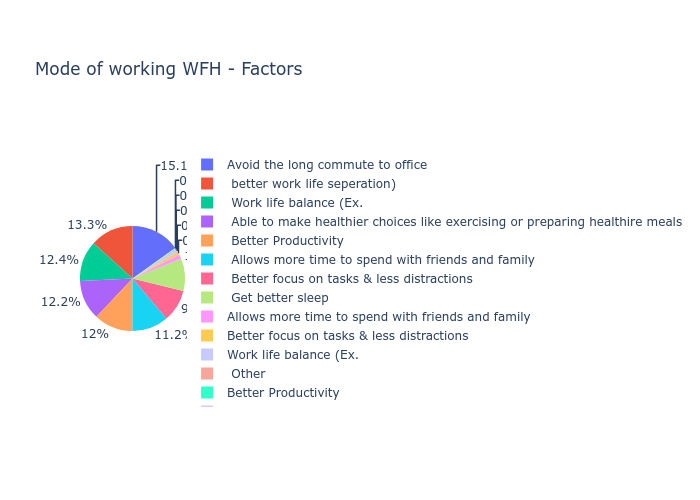

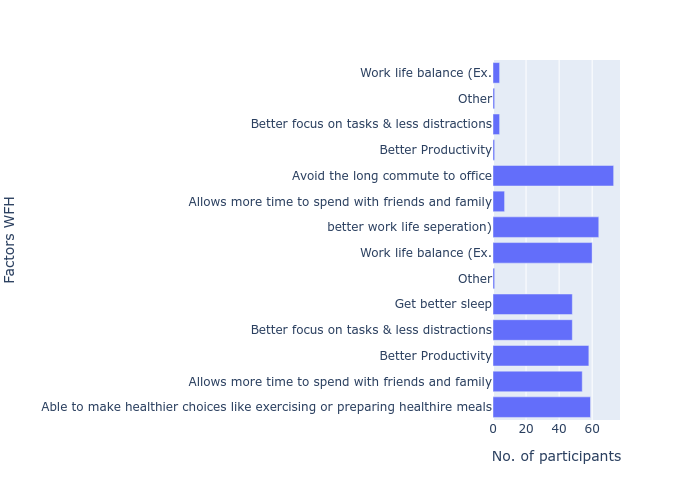

In [561]:
mode_of_working_wfh_group_df = factors_wfo_hybrid_wfh_result_df[factors_wfo_hybrid_wfh_result_df['mode_of_working_coded']== 'WFH'].groupby('factors_val')['factors_val'].count().to_frame('factors_wfh_count').reset_index()

fig = px.pie(mode_of_working_wfh_group_df, values='factors_wfh_count', names='factors_val', title='Mode of working WFH - Factors')

fig.show()

fig = px.bar(mode_of_working_wfh_group_df, x='factors_wfh_count', y='factors_val', labels={
                     "factors_wfh_count": "No. of participants",
                     "factors_val": "Factors WFH"
                 })

fig.show()

# Section 3 Correlation in Project Report

# #2 Correlation between two variables - Scatter plots

In [562]:
study_records.corr(method ='pearson')

,age,no_of_family_members_living_with,total_work_experience,work_experience_with_current_company,current_annual_salary,how_many_days_you_go_to_office,if_personal_choice_how_many_days_willing_to_work_in_office,total_commute_time_in_minutes,rating_wfh_hybrid_wfo,factors_influenced_hybrid_other,entry_id
age,1.000000,0.084724,0.840945,0.532178,0.283748,0.217475,0.223381,0.105994,-0.061401,NaN,0.213679
no_of_family_members_living_with,0.084724,1.000000,0.316182,0.274150,0.114005,0.022081,-0.065555,0.104524,0.118994,NaN,-0.094860
total_work_experience,0.840945,0.316182,1.000000,0.640190,0.418854,0.170396,0.159409,0.137982,-0.058180,NaN,0.124257
work_experience_with_current_company,0.532178,0.274150,0.640190,1.000000,0.170196,0.331645,0.183969,0.062431,-0.111762,NaN,0.106891
current_annual_salary,0.283748,0.114005,0.418854,0.170196,1.000000,0.020947,0.044075,0.040530,-0.099573,NaN,-0.005011
how_many_days_you_go_to_office,0.217475,0.022081,0.170396,0.331645,0.020947,1.000000,0.574552,-0.009761,-0.244622,NaN,0.089850
if_personal_choice_how_many_days_willing_to_work_in_office,0.223381,-0.065555,0.159409,0.183969,0.044075,0.574552,1.000000,0.051464,-0.360461,NaN,0.070328
total_commute_time_in_minutes,0.105994,0.104524,0.137982,0.062431,0.040530,-0.009761,0.051464,1.000000,-0.049894,NaN,-0.003950
rating_wfh_hybrid_wfo,-0.061401,0.118994,-0.058180,-0.111762,-0.099573,-0.244622,-0.360461,-0.049894,1.000000,NaN,-0.007479
factors_influenced_hybrid_other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Is any correlation between Age and salary?

-1 --- 0 --- +1  
- 0 to +1 they are correlated
- -1 to 0 not correlated

In [563]:
corr = study_records['age'].corr(study_records['current_annual_salary'])
print(corr)

0.28374831039957016


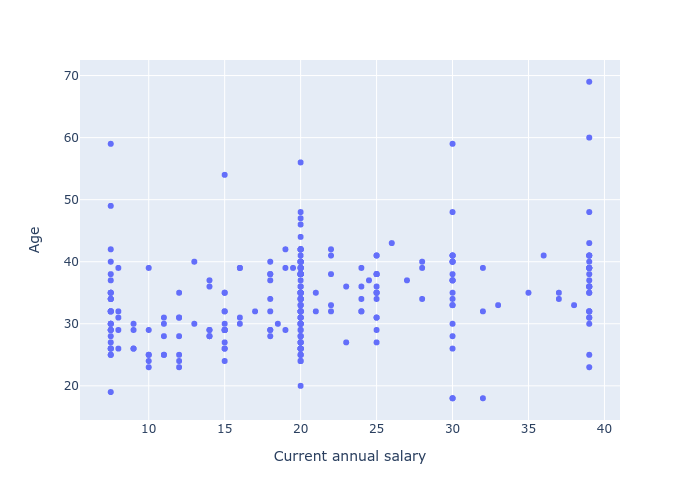

In [564]:
fig = px.scatter(study_records,y='age', x='current_annual_salary',labels={
                     "age": "Age",
                     "current_annual_salary": "Current annual salary"
                 })

fig.show()

# Is any correlation between Age and total_work_experience?

-1 --- 0 --- +1  
- 0 to +1 they are correlated
- -1 to 0 not correlated

In [565]:

corr = study_records['age'].corr(study_records['total_work_experience'])
print(corr)

0.8409448240198869


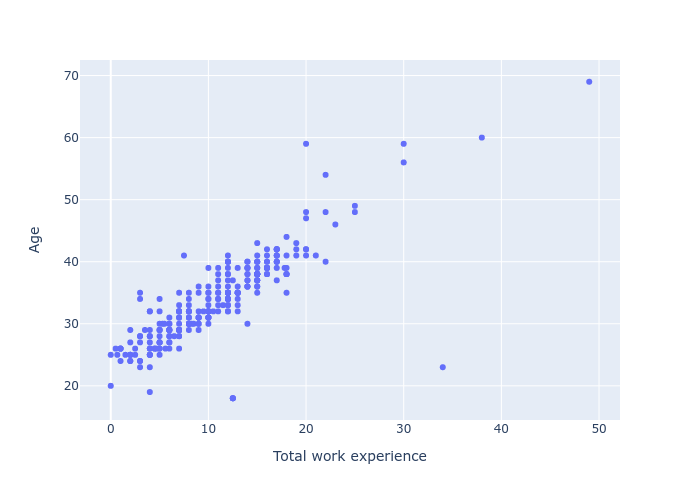

In [566]:
fig = px.scatter(study_records,y='age', x='total_work_experience',labels={
                     "age": "Age",
                     "total_work_experience": "Total work experience"
                 })

fig.show()

# Is any correlation between Age and How many days you go to office?

In [567]:
corr = study_records['age'].corr(study_records['how_many_days_you_go_to_office'])
print(corr)

0.21747452818160626


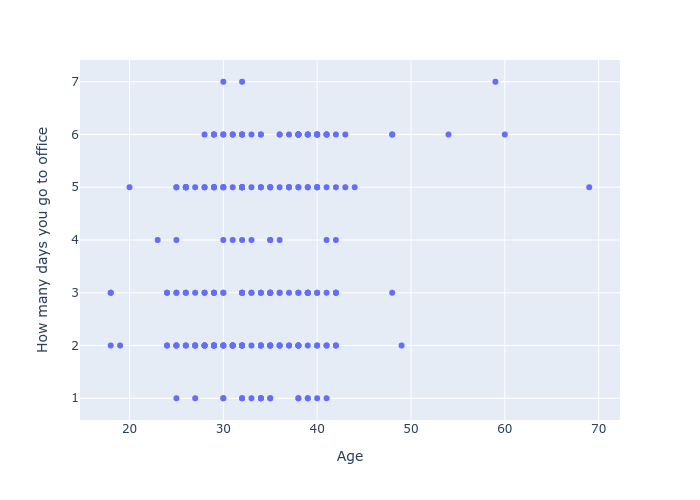

In [568]:
fig = px.scatter(study_records,x='age', y='how_many_days_you_go_to_office',labels={
                     "age": "Age",
                     "how_many_days_you_go_to_office": "How many days you go to office"
                 })

fig.show()

# Is any correlation between Work experience and Current Salary?

In [569]:
corr = study_records['total_work_experience'].corr(study_records['current_annual_salary'])
print(corr)

0.4188541289391467


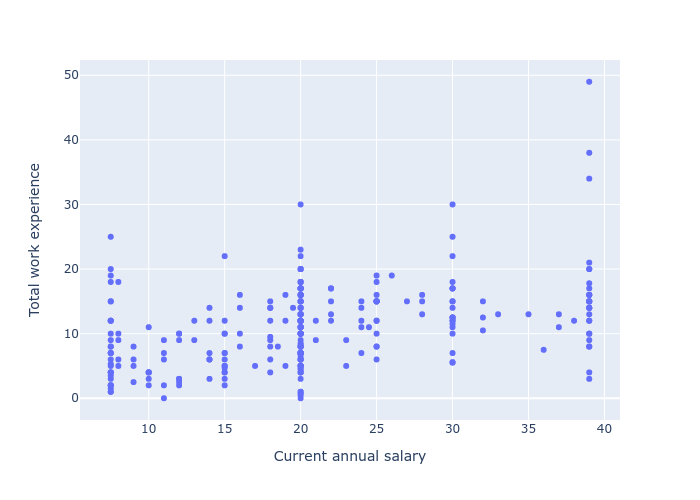

In [570]:
fig = px.scatter(study_records,x='current_annual_salary', y='total_work_experience',labels={
                     "current_annual_salary": "Current annual salary",
                     "total_work_experience": "Total work experience"
                 })

fig.show()

# Is any correlation between Work Experience and How many days you go to office?

In [571]:
corr = study_records['total_work_experience'].corr(study_records['how_many_days_you_go_to_office'])
print(corr)

0.17039595092351234


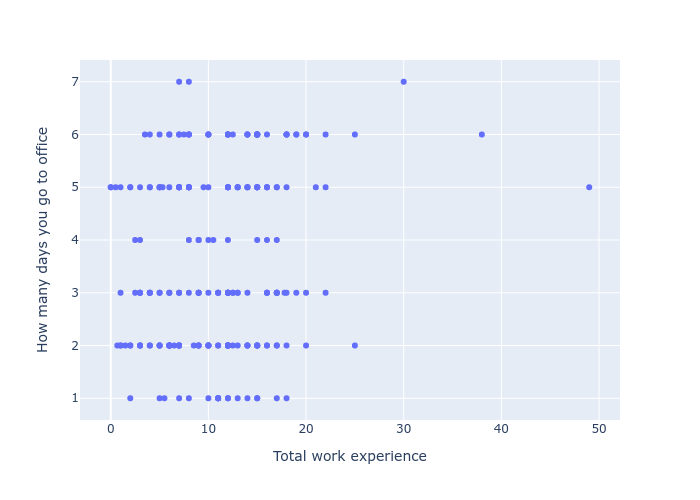

In [572]:
fig = px.scatter(study_records,y='how_many_days_you_go_to_office', x='total_work_experience',labels={
                     "how_many_days_you_go_to_office": "How many days you go to office",
                     "total_work_experience": "Total work experience"
                 })

fig.show()

# Commute time and How many days you go to office?

In [573]:
corr = study_records['total_commute_time_in_minutes'].corr(study_records['how_many_days_you_go_to_office'])
print(corr)

-0.009761444835119282


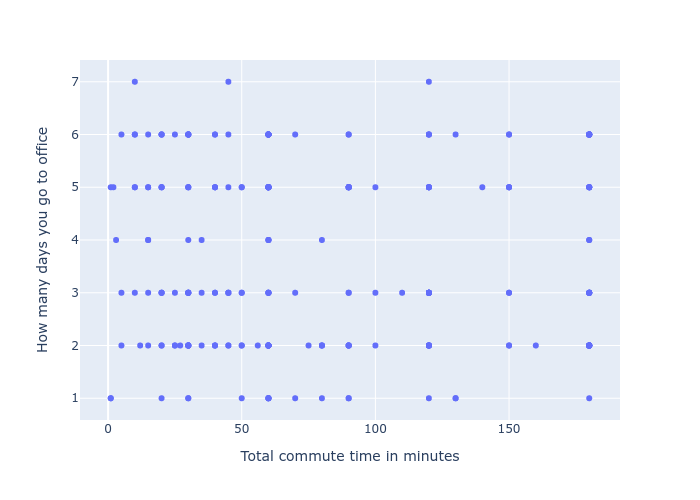

In [574]:
fig = px.scatter(study_records['total_commute_time_in_minutes'], study_records['how_many_days_you_go_to_office'])
fig = px.scatter(study_records,y='how_many_days_you_go_to_office', x='total_commute_time_in_minutes',labels={
                     "how_many_days_you_go_to_office": "How many days you go to office",
                     "total_commute_time_in_minutes": "Total commute time in minutes"
                 })

fig.show()

In [575]:
study_records['pref_mode_of_working'] = ''

study_records['pref_mode_of_working'] = 0
study_records['pref_mode_of_working']= np.where((study_records['rating_wfh_hybrid_wfo']>=0) & (study_records['rating_wfh_hybrid_wfo']<=3), 'WFO', study_records.pref_mode_of_working)
study_records['pref_mode_of_working']= np.where((study_records['rating_wfh_hybrid_wfo']>=4) & (study_records['rating_wfh_hybrid_wfo']<=7), 'Hybrid', study_records.pref_mode_of_working)
study_records['pref_mode_of_working']= np.where((study_records['rating_wfh_hybrid_wfo']>=8) & (study_records['rating_wfh_hybrid_wfo']<=10), 'WFH', study_records.pref_mode_of_working)

study_records


,age,gender,marital_status,country,place_you_live_in,no_of_family_members_living_with,employment_type,current_industry,current_industry_other,Number of employees in your organization,total_work_experience,work_experience_with_current_company,current_role_category,current_role_category_other,current_annual_salary,mode_of_working,how_many_days_you_go_to_office,how_many_days_personal_choice_or_prescribed_by_company,if_personal_choice_how_many_days_willing_to_work_in_office,total_commute_time_in_minutes,rating_wfh_hybrid_wfo,factors_influenced_wfo,factors_influenced_wfo_other,factors_influenced_hybrid,factors_influenced_hybrid_other,factors_influenced_wfh,factors_influenced_wfh_other,entry_id,entry_status,created_at,age_range,work_exp_range,salary_range,pref_mode_of_working
0,48,Male,Married,India,Metro,3,Private,Healthcare,NaN,1-300,20.0,1.0,Others,Consultant,39.0,Complete work from office,6.0,Prescribed by company,5.0,30.0,1,"Better interpersonal connect, Better infrastru...",NaN,NaN,NaN,NaN,NaN,280,unread,2023-02-25 08:11:19,45 - 49 years,20 and above years,35 - 39 Lakhs,WFO
1,46,Female,Married,India,Urban,1,Private,Finance,NaN,10000+,23.0,23.0,Mid-Level Management,NaN,20.0,Complete work from home,NaN,NaN,NaN,60.0,10,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Work life ba...",NaN,279,unread,2023-02-24 17:39:37,45 - 49 years,20 and above years,20 - 24 Lakhs,WFH
2,48,Male,Married,Taiwan,Urban,2,Private,Technology,NaN,1001-10000,22.0,4.0,Mid-Level Management,NaN,20.0,Hybrid,3.0,Prescribed by company,3.0,60.0,5,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,278,unread,2023-02-21 23:10:20,45 - 49 years,20 and above years,20 - 24 Lakhs,Hybrid
3,39,Female,Married,India,Town,3,Private,Finance,NaN,10000+,15.0,8.0,Frontline Managers,NaN,39.0,Complete work from home,NaN,NaN,NaN,180.0,10,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Allows more ...",NaN,277,unread,2023-02-19 22:04:31,35 - 39 years,15 - 20 years,35 - 39 Lakhs,WFH
4,32,Female,Married,India,Metro,2,Private,Finance,NaN,10000+,10.0,7.0,Frontline Managers,NaN,39.0,Hybrid,1.0,Prescribed by company,1.0,130.0,7,NaN,NaN,Relatively less commute as compared to only wo...,NaN,NaN,NaN,276,unread,2023-02-16 04:51:20,30 - 34 years,6 - 10 years,35 - 39 Lakhs,Hybrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,35,Female,Married,India,Metro,3,Private,Technology,NaN,10000+,13.0,1.0,Mid-Level Management,NaN,37.0,Complete work from home,NaN,NaN,NaN,60.0,10,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Allows more ...",NaN,9,unread,2023-02-06 02:25:09,35 - 39 years,11 - 15 years,35 - 39 Lakhs,WFH
272,18,Male,Single,India,Metro,5,Self Employed,Technology,NaN,301-1000,12.5,4.0,Top Level Management,NaN,32.0,Hybrid,2.0,Prescribed by company,1.0,35.0,4,NaN,NaN,Get time to spend with colleagues as well as f...,NaN,NaN,NaN,8,read,2023-02-05 16:10:04,18 - 19 years,11 - 15 years,30 - 34 Lakhs,Hybrid
273,19,Male,Single,India,Metro,1,Private,Technology,NaN,10000+,4.0,1.0,Associates,NaN,7.5,Hybrid,2.0,Prescribed by company,1.0,12.0,8,NaN,NaN,NaN,NaN,"Avoid the long commute to office, Better Produ...",NaN,7,read,2023-02-05 12:10:35,18 - 19 years,3 - 5 years,5 - 9 Lakhs,WFH
274,18,Male,Single,India,Metro,5,Private,Technology,NaN,301-1000,12.5,6.0,Top Level Management,NaN,30.0,Hybrid,3.0,Prescribed by company,1.0,30.0,6,NaN,NaN,Flexibility - Better Control over work hours a...,NaN,NaN,NaN,6,unread,2023-02-05 12:10:32,18 - 19 years,11 - 15 years,30 - 34 Lakhs,Hybrid


# #3 Analysis - Hypothesis Testing
- Z-Test
- Chi-square Test


# Section 4.3 Hypothesis in Project Report

# Z-Test for salary 
## Hypothesis - Left tail test
- H0: Population mean salary is equal to 25
- H1: Population mean salary is less than 25

In [576]:
null_mean = 25

# For alpha = 0.05
alpha = 0.05
ztest_Score, p_value= ztest(study_records['current_annual_salary'],x2=None,value = null_mean,alternative='smaller')

print(ztest_Score)
print(p_value)
if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")
    
# Go For alpha = 0.01
alpha = 0.01
ztest_Score, p_value= ztest(study_records['current_annual_salary'],x2=None,value = null_mean,alternative='smaller')

print(ztest_Score)
print(p_value)
if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

-7.640953342984682
1.0780959647991271e-14
Reject null hypothesis
-7.640953342984682
1.0780959647991271e-14
Reject null hypothesis


# Section 4.3 Hypothesis in Project Report

# Z-Test for Total commute time 
## Hypothesis - right tail test
- HO: Population mean Total commute time in minutes is equal to 60
- H1: Population mean Total commute time in minutes is greaer than 60

In [577]:
null_mean = 60

# For alpha = 0.05
alpha = 0.05
ztest_Score, p_value= ztest(study_records['total_commute_time_in_minutes'],x2=None,value = null_mean,alternative='larger')

print(ztest_Score)
print(p_value)
if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")
    
# Go For alpha = 0.01
alpha = 0.01
ztest_Score, p_value= ztest(study_records['total_commute_time_in_minutes'],x2=None,value = null_mean,alternative='larger')

print(ztest_Score)
print(p_value)
if(p_value < alpha):
    print("Reject null hypothesis")
else:
    print("Do not reject null hypothesis")

3.2689166839603705
0.0005398004296786876
Reject null hypothesis
3.2689166839603705
0.0005398004296786876
Reject null hypothesis


# Section 4.4 Hypothesis in Project Report

## Chi-square test #1 - Between Factors Effecting Mode of working and Mode of working (WFO, Hybrid and WFH)
 
Check if Factors effecting mode of working and Preferred mode of working whether they are associated (dependent / independent)
 
- H0: Factors effecting mode of working and Preferred mode of working are Independent (There is no relationship between 2 categorical variables)
- H1: Factors effecting mode of working and Preferred mode of working are not Independent(There is a relationship between 2 categorical variables)

In [578]:
contingency_table=pd.crosstab(factors_wfo_hybrid_wfh_result_df["factors_val"],factors_wfo_hybrid_wfh_result_df["mode_of_working_coded"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 mode_of_working_coded                               Hybrid  WFH  WFO
factors_val                                                         
 Able to make healthier choices like exercising...       0   59    0
 Allows more time to spend with friends and family       0   54    0
 Better Productivity                                    72   58   29
 Better focus on tasks & less distractions               0   48   29
 Better infrastructure                                   0    0   23
 Get better sleep                                        0   48    0
 Get time to spend with colleagues as well as f...      80    0    0
 Having a more physically active life                   59    0   25
 Not all days are as demanding to be in office          68    0    0
 Optimize Innovation & Collaboration                     0    0   23
 Other                                                   0    1    2
 Relatively less commute as compared to only wo...      76    0    0
 Sense of be

In [579]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[  0  59   0]
 [  0  54   0]
 [ 72  58  29]
 [  0  48  29]
 [  0   0  23]
 [  0  48   0]
 [ 80   0   0]
 [ 59   0  25]
 [ 68   0   0]
 [  0   0  23]
 [  0   1   2]
 [ 76   0   0]
 [ 53   0   0]
 [ 89  60  22]
 [ 95  64  24]
 [  0   7   0]
 [  0  73   0]
 [  1   1   1]
 [  0   4   2]
 [  0   0   2]
 [  0   0  35]
 [108   0   0]
 [ 20   0   0]
 [  3   0   0]
 [  0   1   2]
 [  3   0   0]
 [  6   4   2]]


In [580]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[30.11629526 19.80362117  9.08008357]
 [27.56406685 18.12534819  8.31058496]
 [81.16086351 53.36908078 24.47005571]
 [39.30431755 25.8454039  11.85027855]
 [11.7402507   7.72005571  3.53969359]
 [24.50139276 16.11142061  7.38718663]
 [40.8356546  26.85236769 12.31197772]
 [42.87743733 28.19498607 12.9275766 ]
 [34.71030641 22.82451253 10.46518106]
 [11.7402507   7.72005571  3.53969359]
 [ 1.53133705  1.00696379  0.46169916]
 [38.79387187 25.5097493  11.69637883]
 [27.05362117 17.78969359  8.15668524]
 [87.2862117  57.39693593 26.31685237]
 [93.41155989 61.42479109 28.16364903]
 [ 3.57311978  2.34958217  1.07729805]
 [37.26253482 24.50278552 11.23467967]
 [ 1.53133705  1.00696379  0.46169916]
 [ 3.06267409  2.01392758  0.92339833]
 [ 1.02089136  0.67130919  0.30779944]
 [17.86559889 11.74791086  5.38649025]
 [55.1281337  36.25069638 16.62116992]
 [10.20891365  6.71309192  3.07799443]
 [ 1.53133705  1.00696379  0.46169916]
 [ 1.53133705  1.00696379  0.46169916]
 [ 1.

In [581]:
no_of_rows=len(contingency_table.iloc[0:27,0])
no_of_columns=len(contingency_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 52


In [582]:
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 943.6086382431853
critical_value: 69.83216033984813


In [583]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 0.0
Significance level:  0.05
Degree of Freedom:  52
chi-square statistic: 943.6086382431853
critical_value: 69.83216033984813
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## Chi-square test #2 - Between Gender and Mode of working (WFO, Hybrid and WFH)

Check if gender and mode_of_working_coded whether they are associated (dependent / independent)

- H0: Gender and preferred mode of working are Independent (There is no relationship between 2 categorical variables)
- H1: Gender and preferred mode of working are not Independent(There is a relationship between 2 categorical variables)

In [584]:


contingency_table=pd.crosstab(study_records["gender"],study_records["pref_mode_of_working"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 pref_mode_of_working  Hybrid  WFH  WFO
gender                                
Female                    37   18    5
Male                     104   71   39
Non-binary                 0    1    1


In [585]:
# Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 37  18   5]
 [104  71  39]
 [  0   1   1]]


In [586]:
# Expected Values
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 30.65217391  19.56521739   9.7826087 ]
 [109.32608696  69.7826087   34.89130435]
 [  1.02173913   0.65217391   0.32608696]]


In [587]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 4


In [588]:
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 2.927760323457281
critical_value: 9.487729036781154


In [589]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 0.569986414355172
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 2.927760323457281
critical_value: 9.487729036781154
p-value: 0.569986414355172
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


## Chi-square test #3 - Between Category of Employment type and Mode of working (WFO, Hybrid and WFH)

Check if Employment type and preferred mode of working whether they are associated (dependent / independent)

- H0: Employment type and preferred mode of working are Independent (There is no relationship between 2 categorical variables)
- H1: Employment type in and preferred mode of working are not Independent(There is a relationship between 2 categorical variables)

In [590]:

contingency_table=pd.crosstab(study_records["employment_type"],study_records["pref_mode_of_working"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 pref_mode_of_working  Hybrid  WFH  WFO
employment_type                       
Government                16    4    8
Private                  119   80   34
Self Employed              6    6    3


In [591]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 16   4   8]
 [119  80  34]
 [  6   6   3]]


In [592]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 14.30434783   9.13043478   4.56521739]
 [119.0326087   75.97826087  37.98913043]
 [  7.66304348   4.89130435   2.44565217]]


In [593]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:3])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)

Degree of Freedom:- 4


In [594]:
alpha = 0.05

from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

chi-square statistic:- 3.9089309521635327
critical_value: 9.487729036781154


In [595]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

p-value: 0.41847098201013233
Significance level:  0.05
Degree of Freedom:  4
chi-square statistic: 3.9089309521635327
critical_value: 9.487729036781154
p-value: 0.41847098201013233
Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
